<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##  

## **Company Financial**

### **CRUD**
</center>

## Deskripsi Kolom
- `company_name` - nama perusahaan
- `status_label` - status perusahaan (alive = aktif, failed = bangkrut)
- `year` - tahun
- `cost_of_goods_sold` - jumlah total yang dibayar perusahaan sebagai biaya yang terkait langsung dengan penjualan produk
- `depreciation_and_amortization` - depreciation merujuk pada penurunan nilai aset yang berwujud seiring berjalannya waktu (seperti properti, mesin, gedung, dan pabrik), sedangkan amortization merujuk pada penurunan nilai aset yang tidak berwujud seiring berjalannya waktu
- `ebitda (earnings before interest, taxes, depreciation, and amortization)` - laba yang diperoleh perusahaan sebelum dikurangi bunga, pajak, depreciation, dan amortization
inventory - nilai barang-barang dan bahan baku yang dimiliki perusahaan untuk diproduksi atau dijual
- `total_receivables` - nilai yang harus diterima perusahaan dari barang/jasa yang diberikan tetapi belum dibayar oleh pelanggan
- `market_value` - harga suatu aset di pasar (dalam dataset ini, merujuk pada kapitalisasi pasar karena perusahaan diperdagangkan secara publik di pasar saham)
- `net_sales` - jumlah pendapatan dari penjualan setelah dikurangi pengembalian barang, potongan harga, dan diskon
- `total_assets` - semua aset atau barang berharga milik perusahaan
- `total_long_term_debt` - jumlah hutang yang harus dibayar perusahaan lebih dari satu tahun dari sekarang
- `ebit (earnings before interest and taxes)` - laba perusahaan sebelum dikurangi bunga dan pajak
- `gross_profit (laba kotor)` - laba yang diperoleh bisnis setelah dikurangi semua biaya yang terkait dengan produksi dan penjualan produk/jasa
- `retained_earnings` - jumlah laba perusahaan yang tersisa setelah membayar semua biaya langsung, biaya tidak langsung, pajak penghasilan, dan dividen kepada pemegang saham
- `total_liabilities` - gabungan hutang dan kewajiban yang dimiliki perusahaan terhadap pihak luar
- `total_operating_expenses` - total biaya operasional
- `current_ratio` - rasio keuangan yang membandingkan total aset lancar perusahaan dengan utang lancar perusahaan
- `net_profit_margin_category` - kategori yang menunjukkan seberapa besar persentase keuntungan bersih perusahaan dibandingkan dengan pendapatannya

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv("company_train.csv")
test = pd.read_csv("company_test_classif.csv")
train.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin


# Data Shape

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62896 entries, 0 to 62895
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             62896 non-null  object 
 1   company_name                   62896 non-null  object 
 2   status_label                   62896 non-null  object 
 3   year                           62896 non-null  int64  
 4   cost_of_goods_sold             62896 non-null  float64
 5   depreciation_and_amortization  62896 non-null  float64
 6   ebitda                         62896 non-null  float64
 7   inventory                      62896 non-null  float64
 8   total_receivables              62896 non-null  float64
 9   market_value                   62896 non-null  float64
 10  net_sales                      62896 non-null  float64
 11  total_assets                   62896 non-null  float64
 12  total_long_term_debt           62896 non-null 

In [ ]:
total_rows = train.shape[0]
total_columns = train.shape[1]

numerical = train.select_dtypes(include=[float, int]).shape[1]
non_numerical = train.select_dtypes(exclude=[float, int]).shape[1]

In [ ]:
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
print(f"Percentage of numerical columns: {numerical / total_columns * 100:.2f}%")
print(f"Percentage of non-numerical columns: {non_numerical / total_columns * 100:.2f}%")

Total rows: 62896
Total columns: 20
Percentage of numerical columns: 80.00%
Percentage of non-numerical columns: 20.00%


# Deskriptif statistik

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Function to create KDE plot with descriptive statistics
def plot_distribution_analysis(df, feature, fig_size=(12, 6)):
    # Calculate descriptive statistics
    stats_dict = {
        'Mean': df[feature].mean(),
        'Median': df[feature].median(),
        'Std Dev': df[feature].std(),
        'Skewness': df[feature].skew(),
        'Kurtosis': df[feature].kurtosis(),
        'Min': df[feature].min(),
        'Max': df[feature].max()
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=fig_size)

    # KDE plot
    sns.kdeplot(data=df[feature], ax=ax1)
    ax1.axvline(stats_dict['Mean'], color='red', linestyle='--', label='Mean')
    ax1.axvline(stats_dict['Median'], color='green', linestyle='--', label='Median')
    ax1.set_title(f'Distribution of {feature}')
    ax1.legend()

    # Box plot
    sns.boxplot(y=df[feature], ax=ax2)
    ax2.set_title(f'Box Plot of {feature}')

    # Add descriptive statistics as text
    stats_text = '\n'.join([f'{k}: {v:,.2f}' for k, v in stats_dict.items()])
    fig.text(1.02, 0.5, stats_text, fontsize=10, va='center')

    plt.tight_layout()
    plt.show()

    return stats_dict

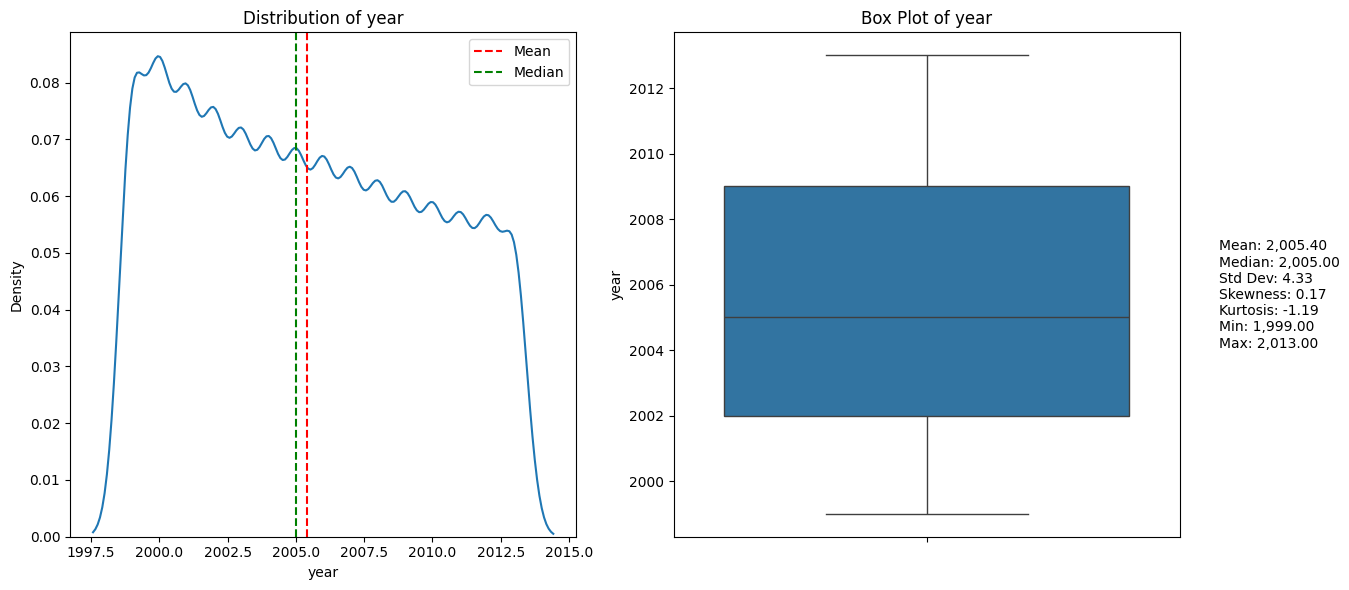

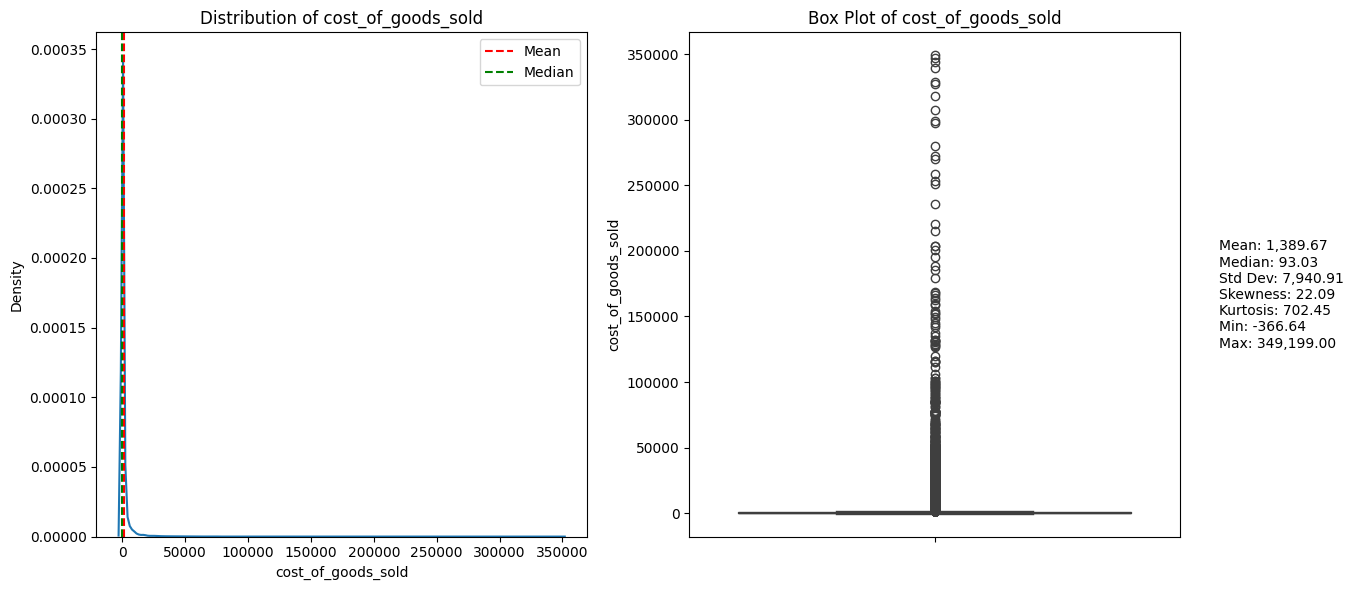

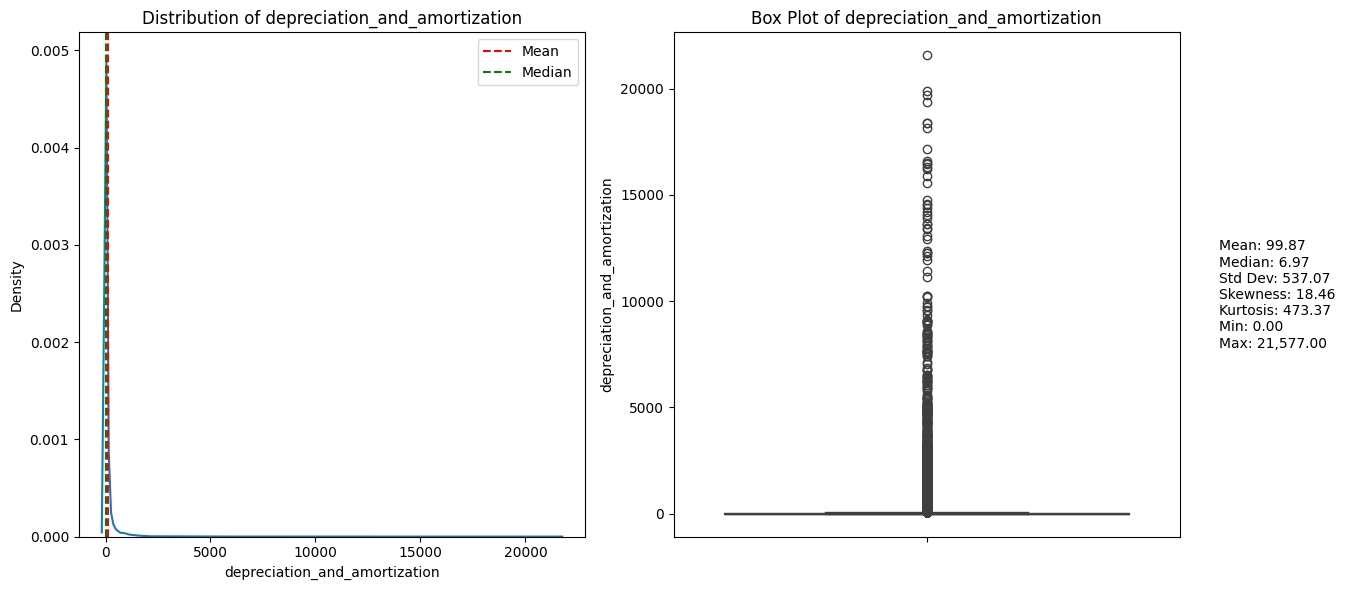

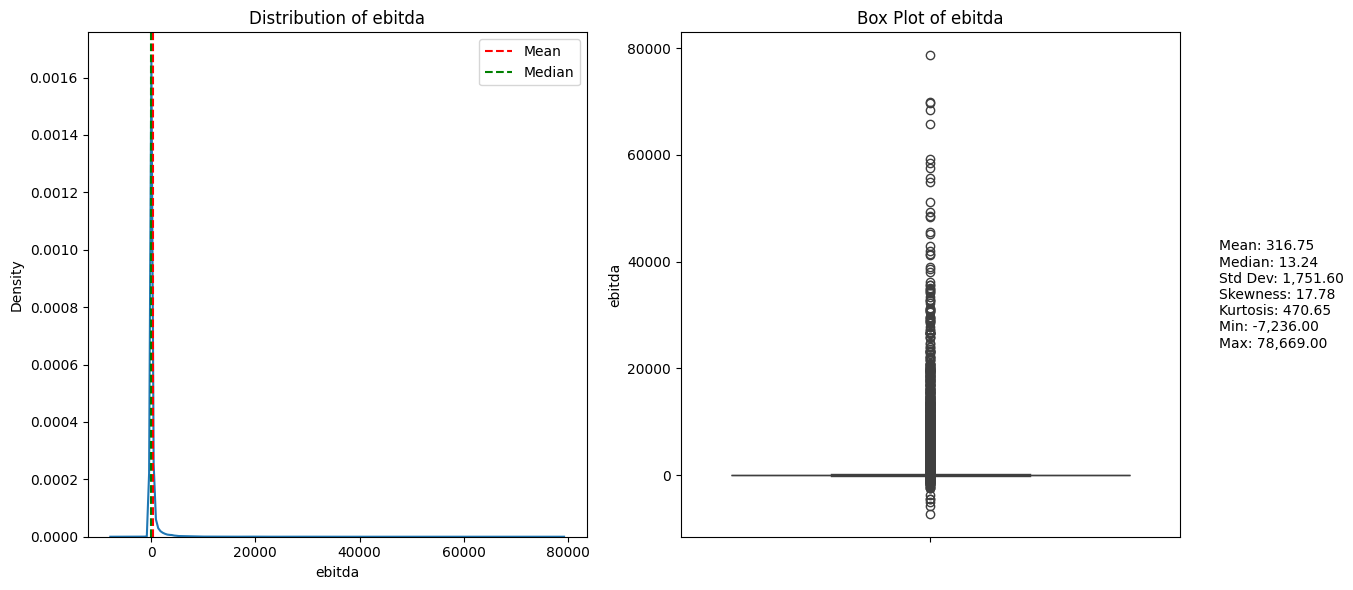

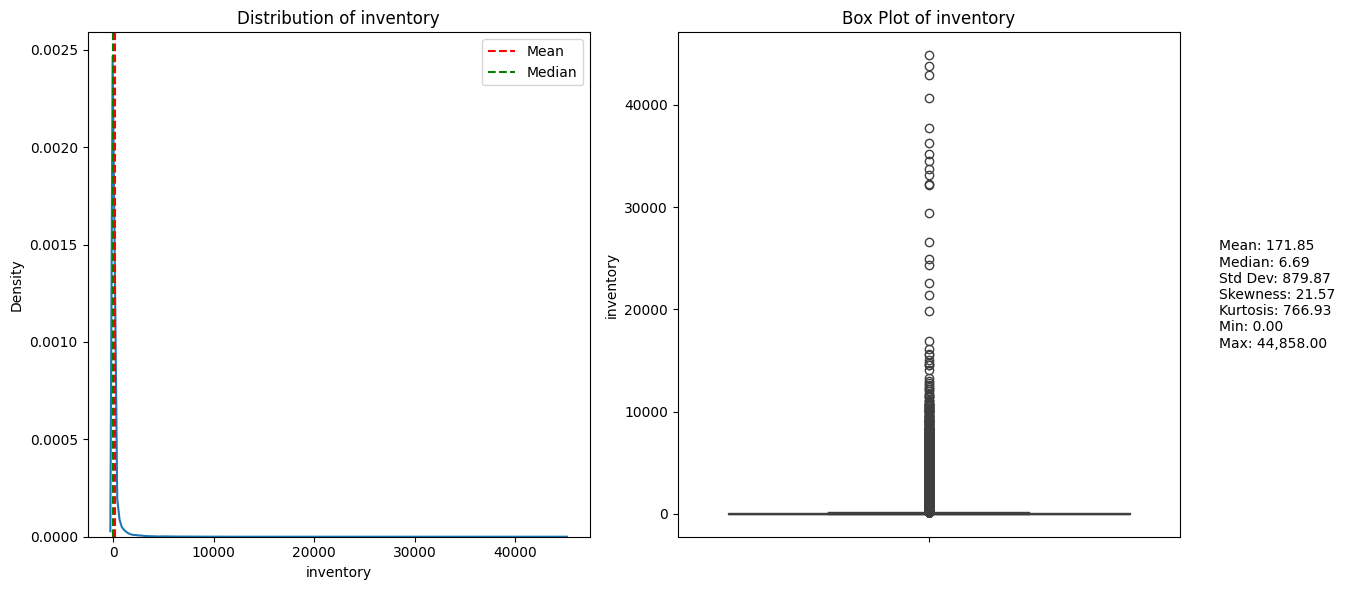

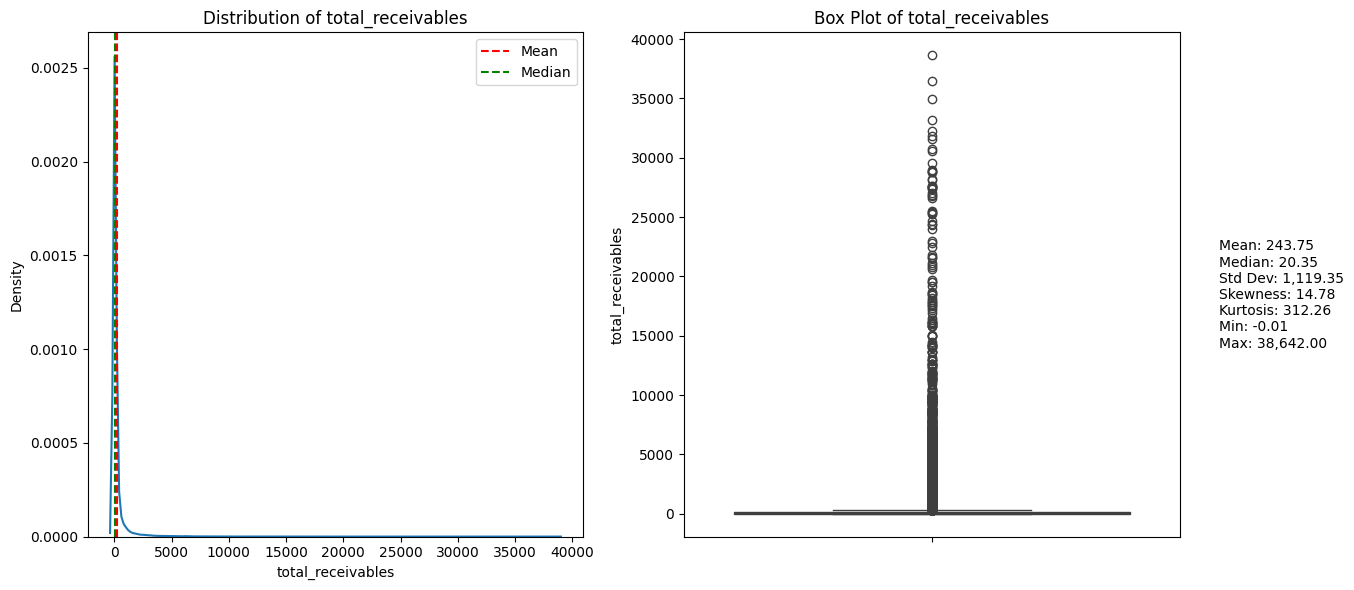

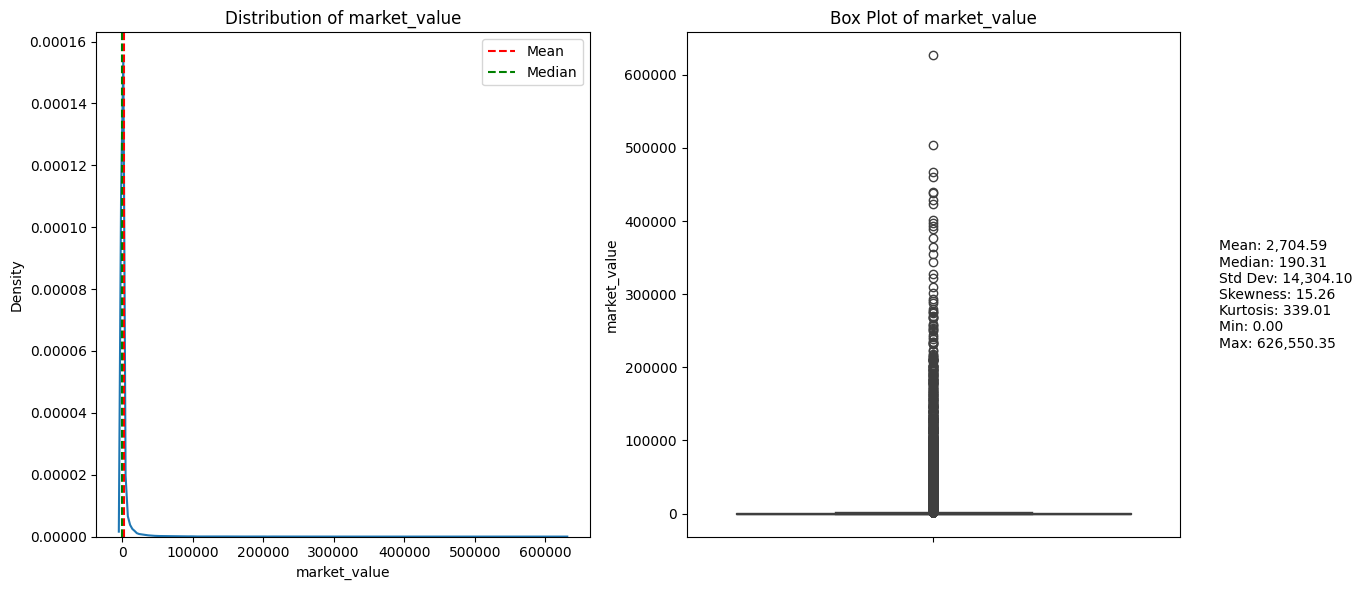

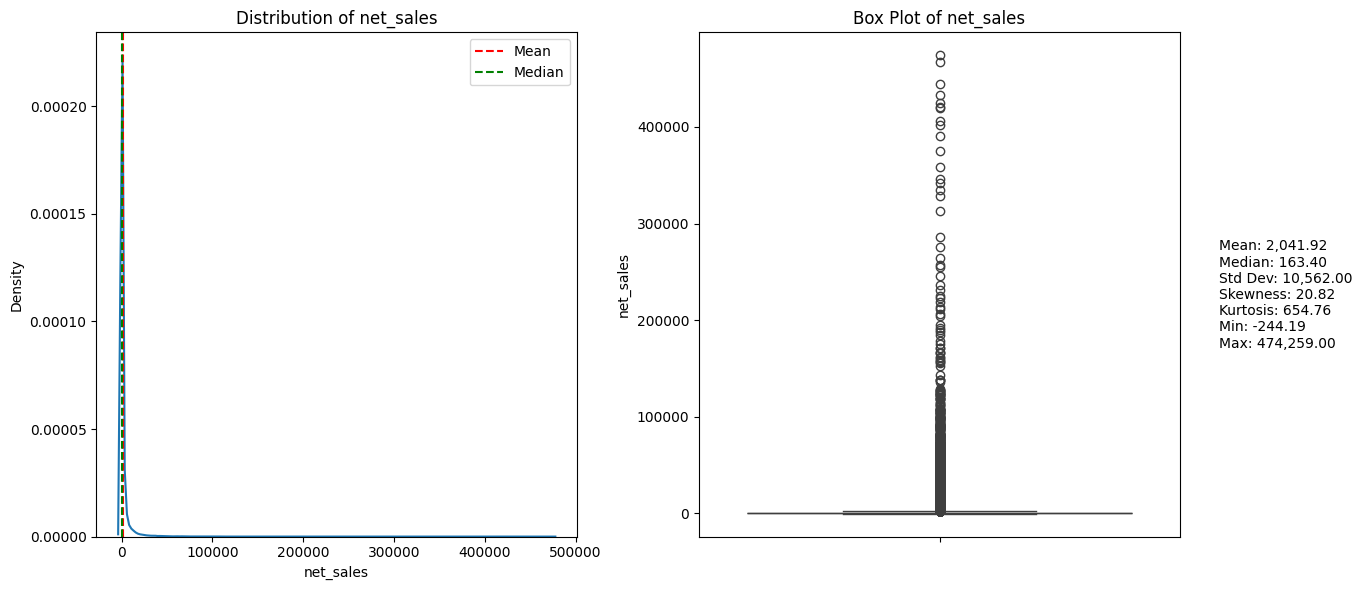

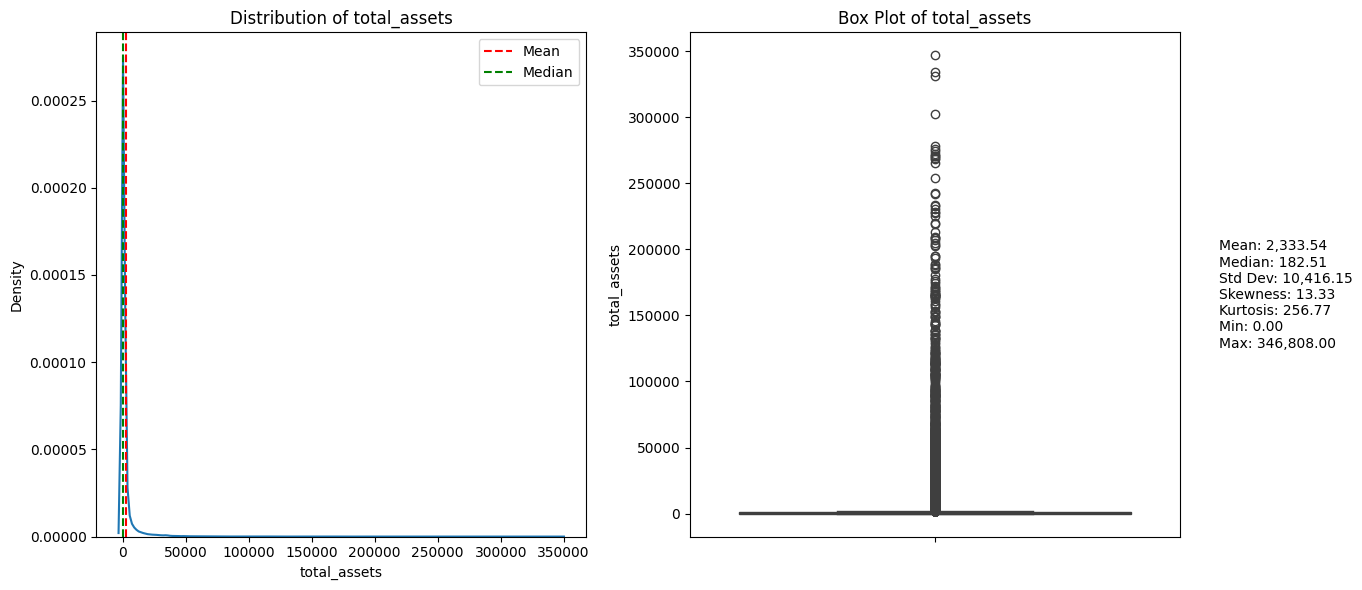

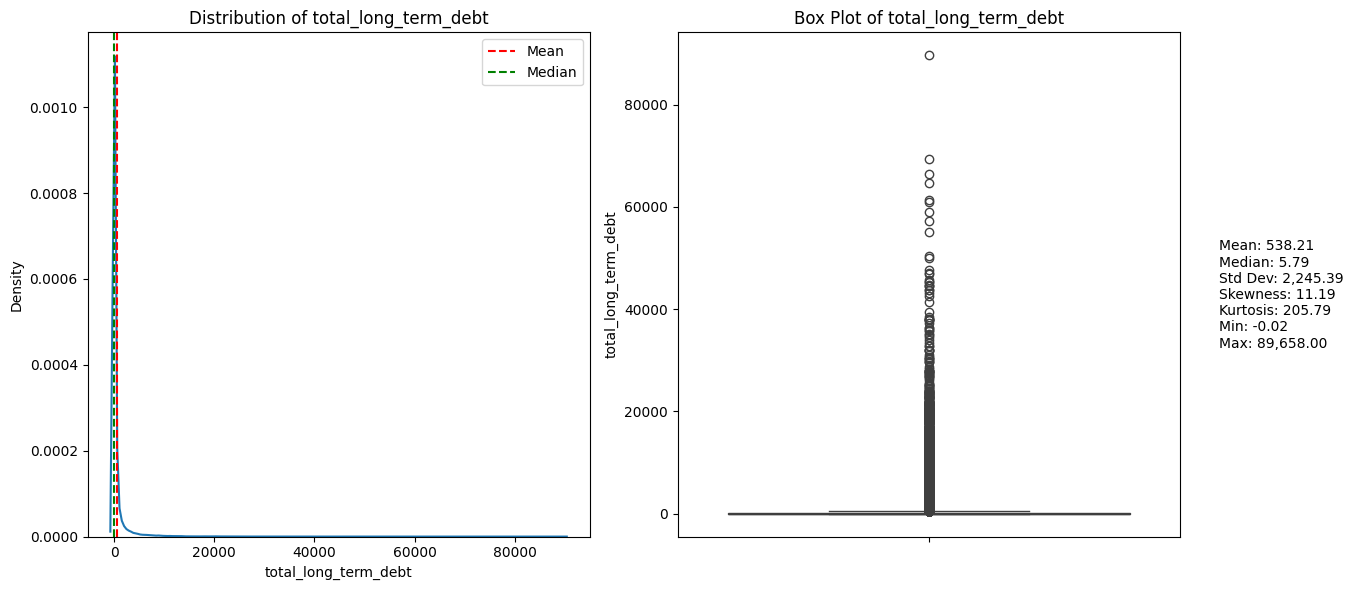

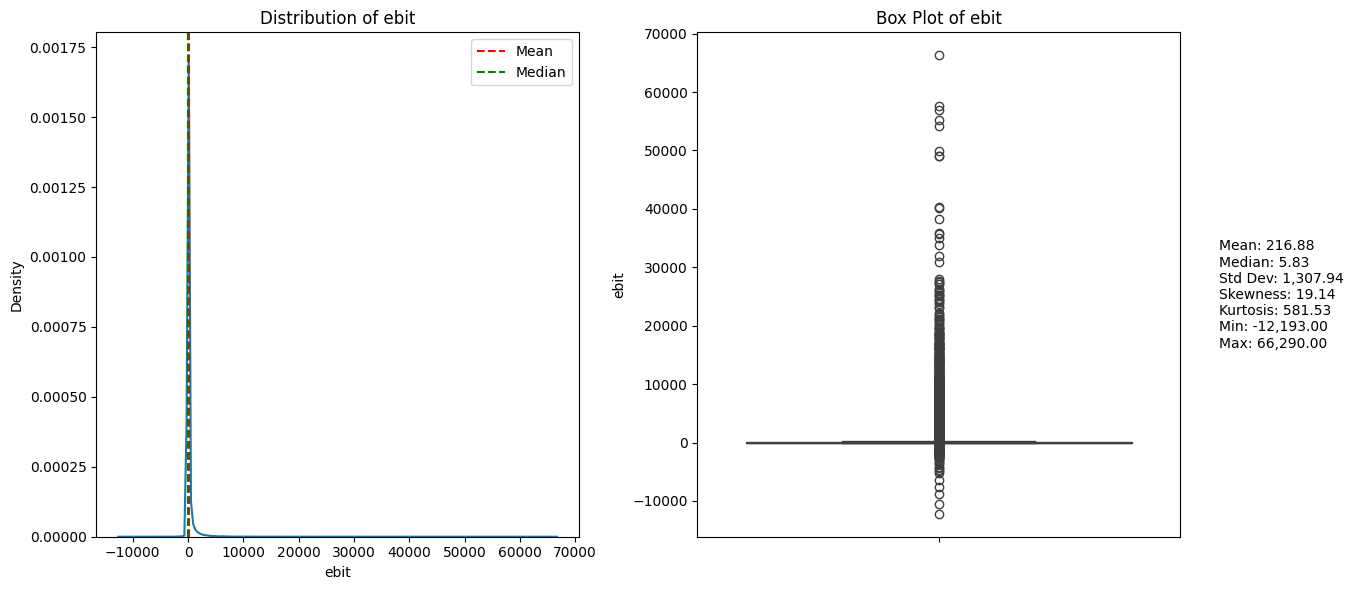

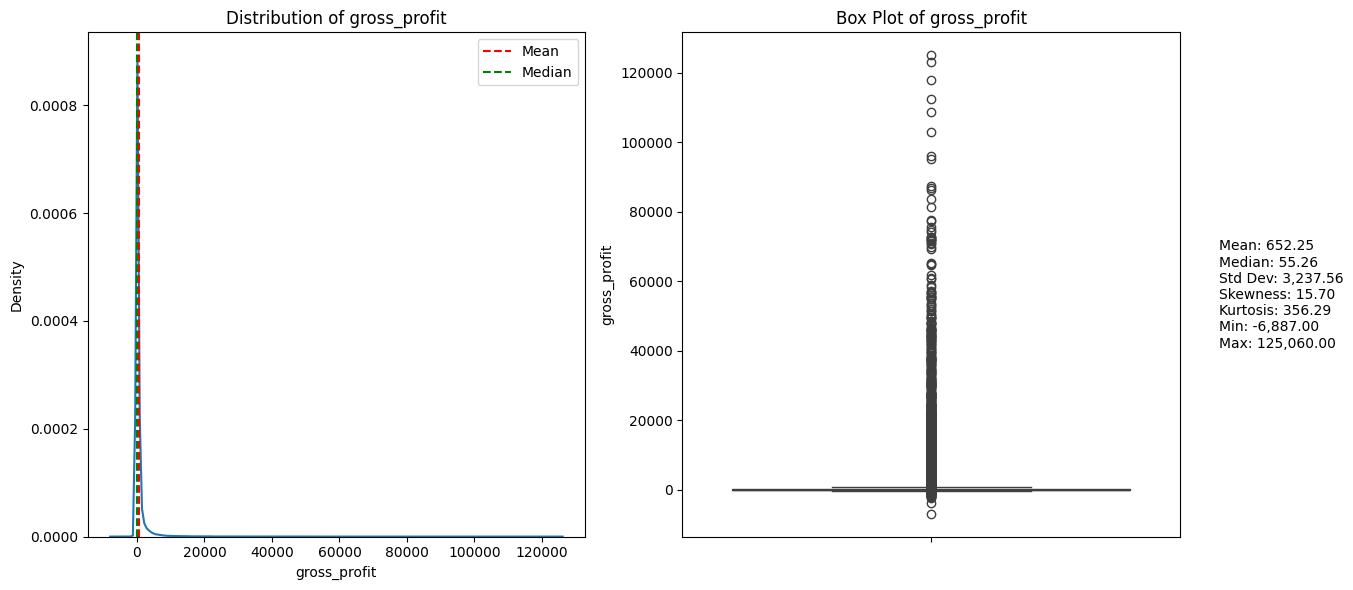

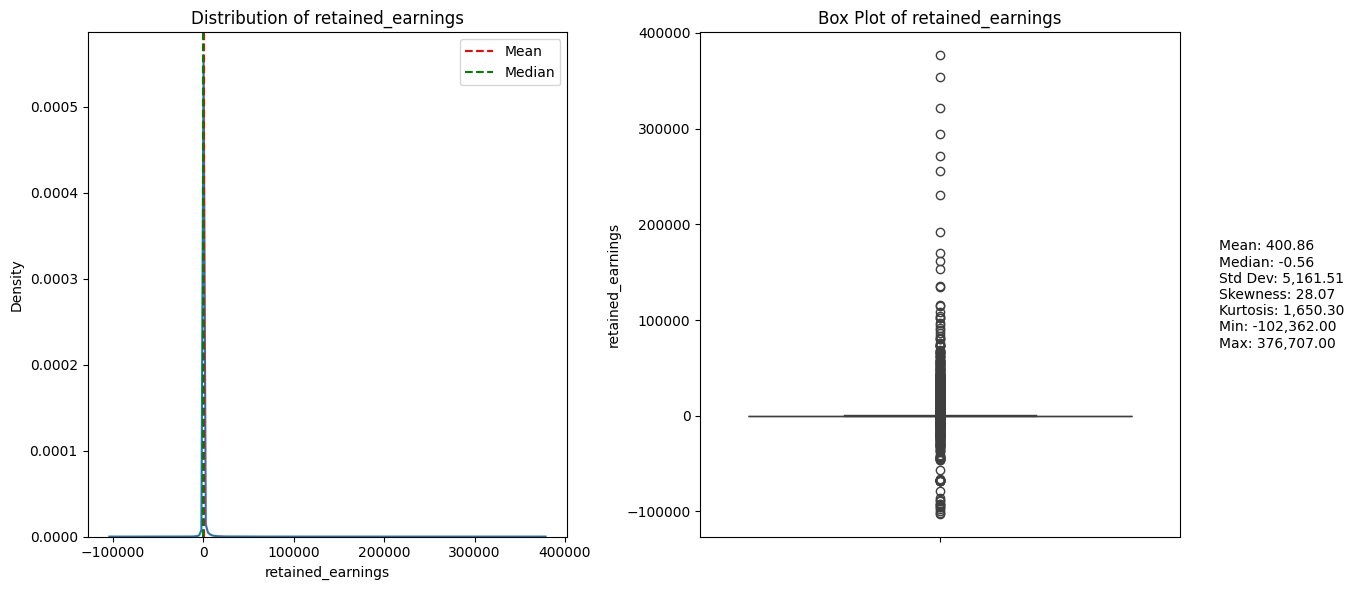

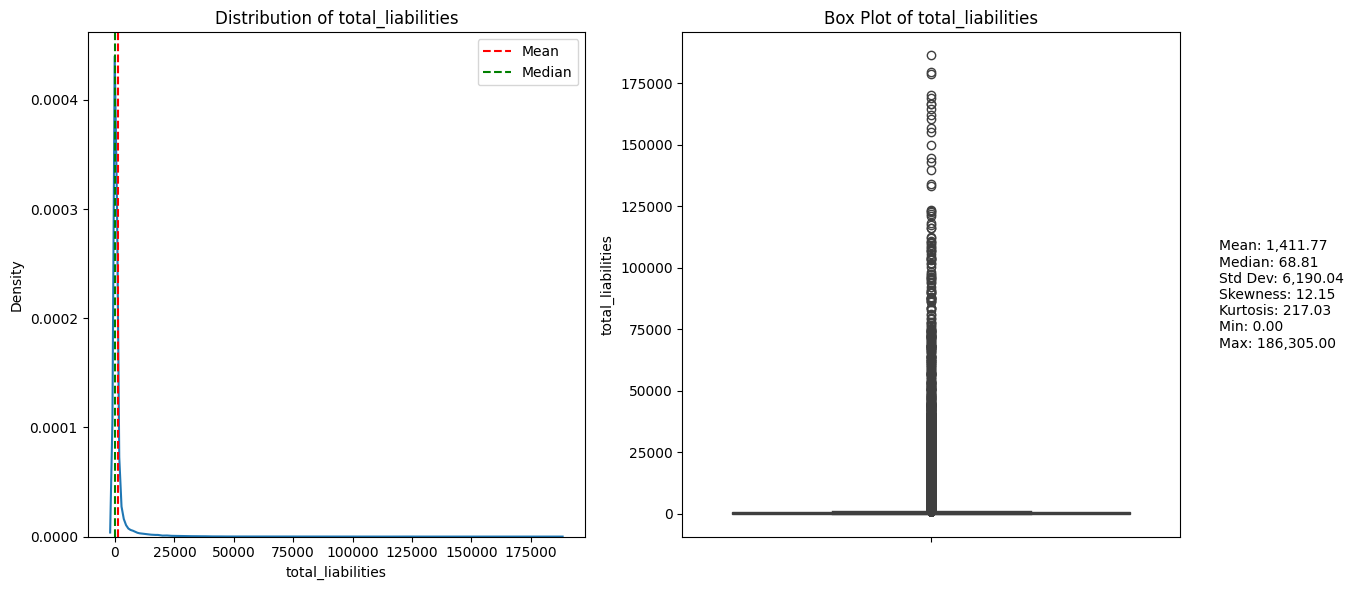

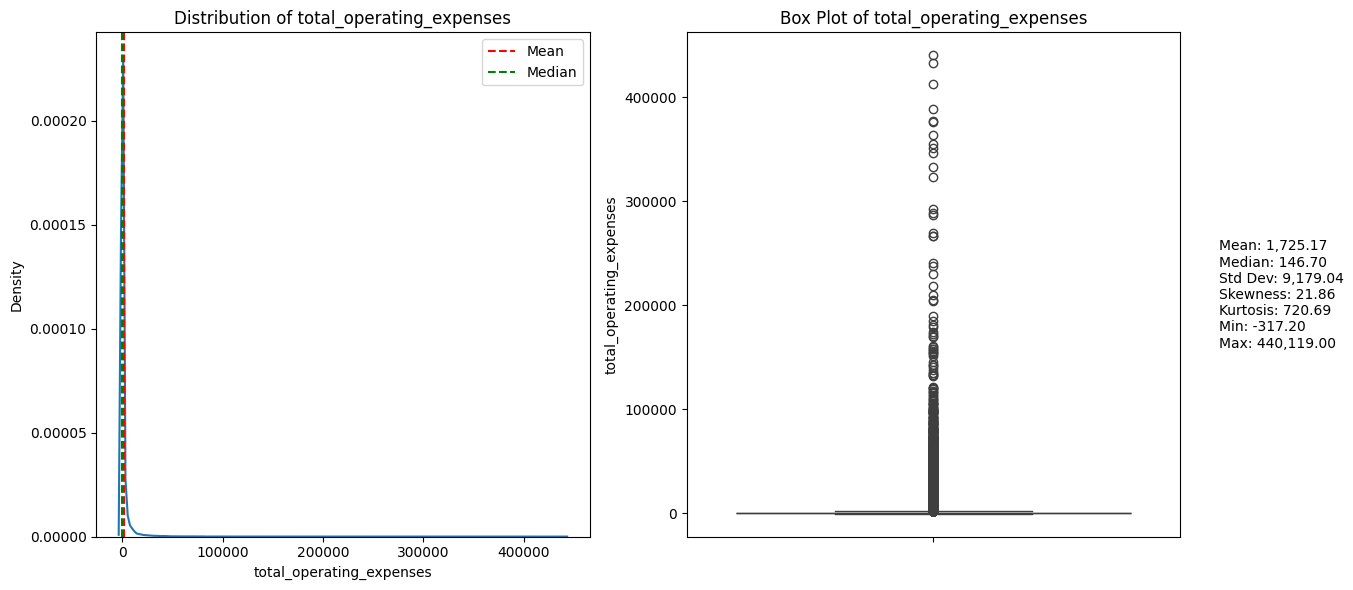

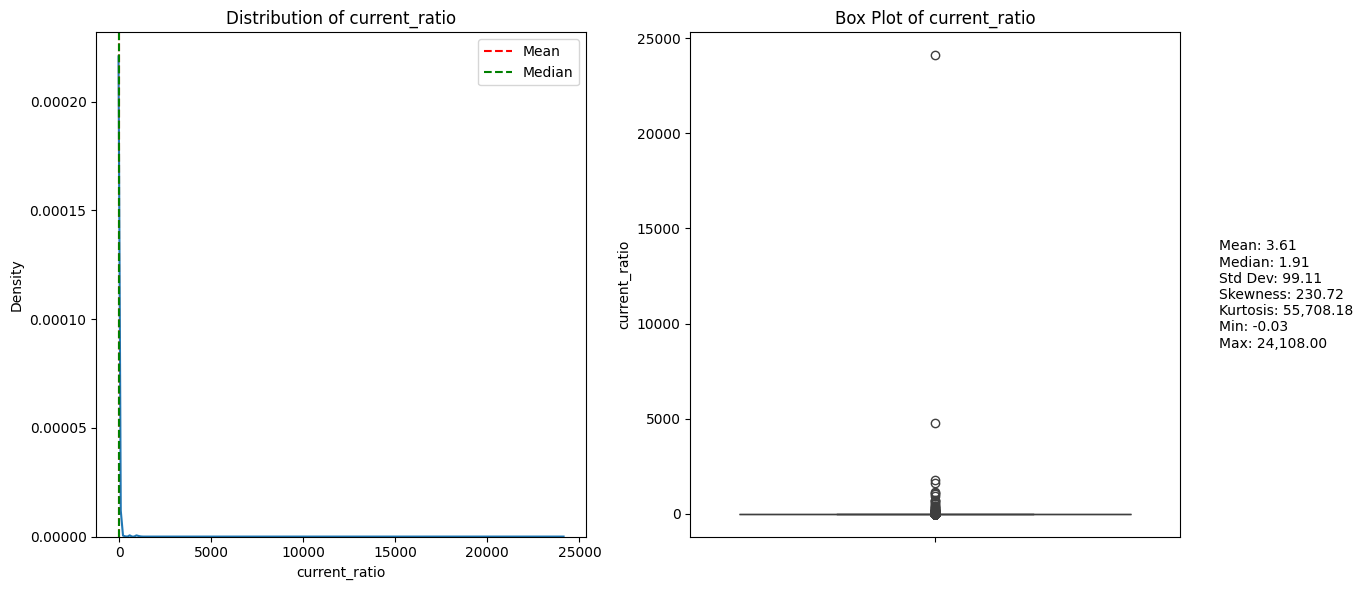

In [ ]:
# Create plots for each numerical feature
for feature in train.select_dtypes(include=['float64', 'int64']).columns:
    plot_distribution_analysis(train, feature)


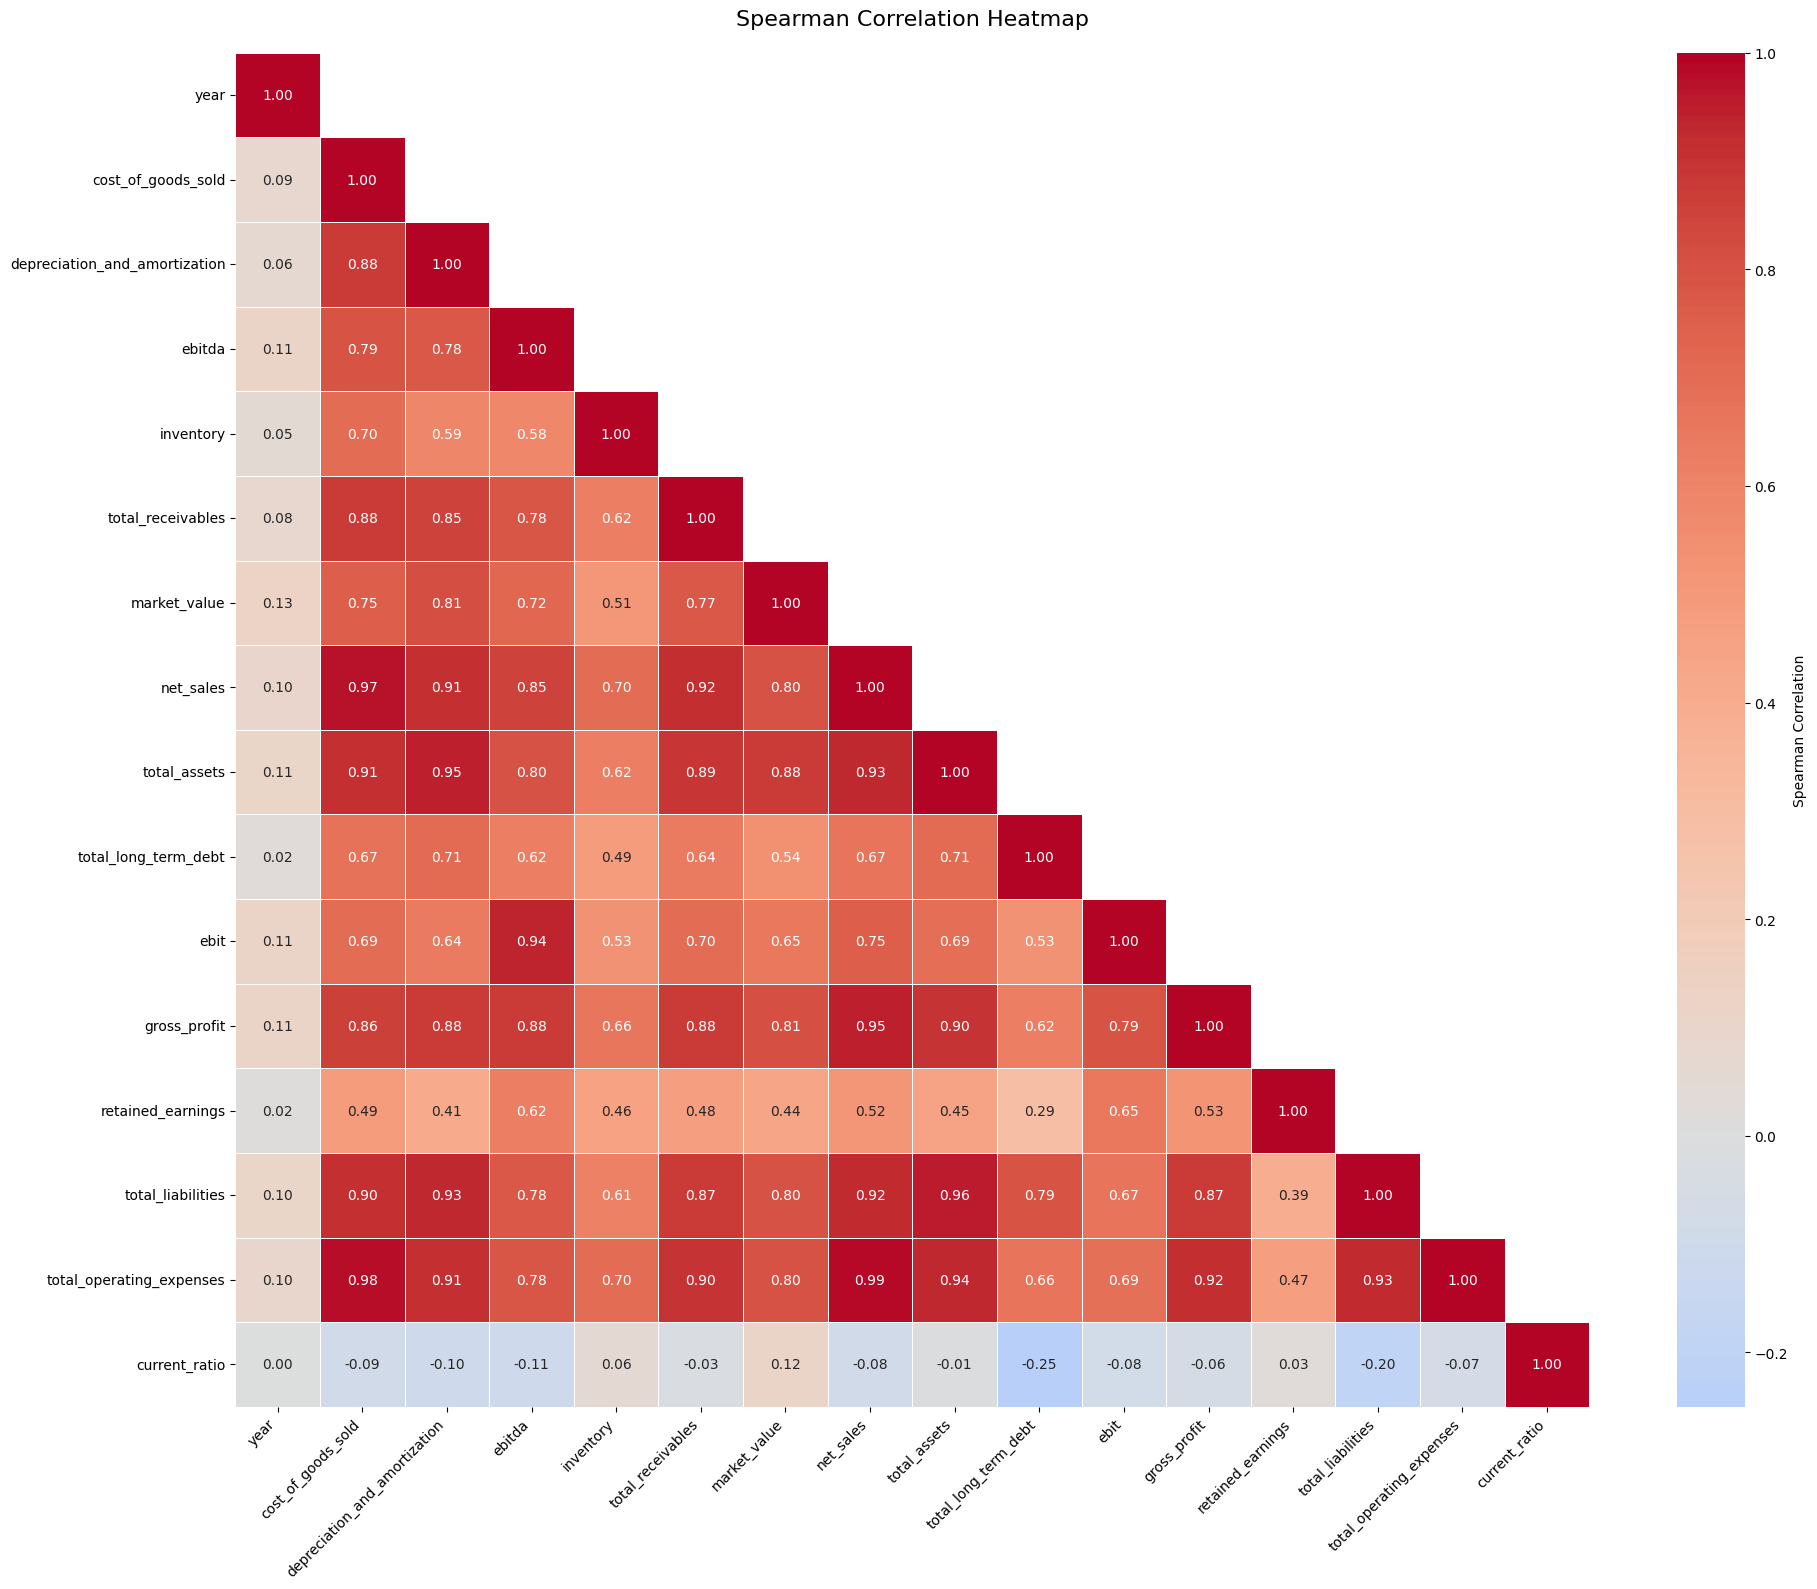

In [ ]:
# Korelasi memakai spearman dikareanakan banyaknya outlier
correlation_matrix = train.select_dtypes(include=[float, int]).corr(method='spearman')
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Create mask for upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Spearman Correlation'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Spearman Correlation Heatmap', pad=20, size=16)
plt.tight_layout()

plt.show()

# Preprocessing

In [ ]:
train.isna().sum()

,0
ID,0
company_name,0
status_label,0
year,0
cost_of_goods_sold,0
depreciation_and_amortization,0
ebitda,0
inventory,0
total_receivables,0
market_value,0


In [ ]:
train.duplicated().sum()

0

In [ ]:
for col in train.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(train[col].value_counts(),'\n')

No. of unique values in column ID:
ID
CQZW3V9G    1
CG44I617    1
CRM5RFOM    1
CWJV1710    1
CR7UKI1K    1
           ..
CAOB5WHP    1
CY30JXXW    1
C72IXBDZ    1
C1MI75R4    1
CPLON1LQ    1
Name: count, Length: 62896, dtype: int64 

No. of unique values in column company_name:
company_name
C_1       15
C_2448    15
C_2368    15
C_2369    15
C_2373    15
          ..
C_7724     1
C_5797     1
C_5798     1
C_5800     1
C_8970     1
Name: count, Length: 8238, dtype: int64 

No. of unique values in column status_label:
status_label
alive     58105
failed     4791
Name: count, dtype: int64 

No. of unique values in column net_profit_margin_category:
net_profit_margin_category
Low Profit Margin        42240
High Profit Margin       10446
Healthy Profit Margin    10210
Name: count, dtype: int64 



In [ ]:
Q3 = train.select_dtypes(include='number').quantile(0.75)
Q1 = train.select_dtypes(include='number').quantile(0.25)
IQR = Q3 - Q1

In [ ]:
Jumlah_Outlier = []

for col in train.select_dtypes(np.number).columns:
    outliers = ((train[col] < (Q1[col] - 1.5 * IQR[col])) | (train[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers/len(train)])

indexOutput = list(range(0, len(Jumlah_Outlier)))

pd.DataFrame(Jumlah_Outlier, columns=['Column', 'Outlier','persentase'],index=indexOutput).sort_values(by=['persentase'], ascending = False,ignore_index=True)

,Column,Outlier,persentase
0,retained_earnings,14045,0.223305
1,ebit,10419,0.165654
2,total_long_term_debt,10158,0.161505
3,inventory,9915,0.157641
4,total_liabilities,9803,0.155860
5,ebitda,9606,0.152728
6,cost_of_goods_sold,9351,0.148674
7,total_assets,9335,0.148420
8,market_value,9109,0.144826
9,net_sales,9077,0.144318


### Penanganan Outlier

Kami memutuskan untuk tidak menangani outlier karena:

1. Relevansi Bisnis: Outlier dalam data keuangan bisa mewakili situasi bisnis yang signifikan, seperti perusahaan dengan pertumbuhan luar biasa atau yang mengalami kesulitan keuangan ekstrem. Menghapus outlier berpotensi menghilangkan wawasan berharga tentang performa dan risiko perusahaan.

2. Keanekaragaman Perusahaan: Perusahaan dalam dataset ini mungkin sangat bervariasi dalam hal ukuran, industri, dan strategi keuangan. Outlier dapat mencerminkan perbedaan yang alami dan penting, seperti perusahaan besar dengan aset atau pendapatan yang sangat tinggi dibandingkan perusahaan kecil.

3. Analisis Risiko dan Peluang: Dalam konteks keuangan, memahami ekstrem sangatlah penting. Outlier dapat membantu mengidentifikasi perusahaan yang menghadapi risiko tinggi (misalnya, beban utang besar) atau yang menunjukkan peluang investasi potensial (seperti peningkatan pasar yang signifikan).

Oleh karena itu, kami akan menggunakan model klasifikasi dan regresi yang robust terhadap outlier, seperti Random Forest, untuk memastikan hasil analisis dapat diandalkan.


# EDA

## 1. Bagaimana karakteristik perusahaan yang bangkrut pada tahun dengan jumlah kebangkrutan tertinggi?

In [ ]:
# perusahaan yang bangkrut pada tahun dengan jumlah kebangkrutan yang tinggi
# Count number of failed companies by year
failed_by_year = train[train['status_label'] == 'failed'].groupby('year').size()

# Get the year with maximum failures
year_max_failures = failed_by_year.idxmax() #2003

# Filter failed companies in that specific year
failed_companies = train[
    (train['status_label'] == 'failed') &
    (train['year'] == year_max_failures)
]
failed_companies

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
50,CFPJG7GC,C_6,failed,2003,14430.000,1377.000,582.000,516.000,796.000,2066.5869,17440.000,29330.000,13126.000,-795.000,3010.000,-1336.000,29284.000,16858.000,0.71,Low Profit Margin
153,CM20GONS,C_14,failed,2003,224.944,1.036,13.973,41.696,46.100,190.5996,271.276,123.519,0.000,12.937,46.332,47.182,38.950,257.303,2.84,Low Profit Margin
204,C7MN6H36,C_20,failed,2003,1700.737,5.665,14.893,6.874,140.425,57.1539,1721.929,210.261,11.475,9.228,21.192,30.117,168.029,1707.036,1.22,Low Profit Margin
390,CERJ892N,C_38,failed,2003,1.530,0.615,0.746,0.000,0.453,11.3732,3.148,16.470,3.023,0.131,1.618,1.477,12.595,2.402,0.30,Low Profit Margin
507,C086JZ9M,C_53,failed,2003,349.167,24.162,37.433,19.004,39.979,13.3995,423.920,230.324,175.184,13.271,74.753,-119.894,272.259,386.487,1.28,Low Profit Margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56286,CKIQO5UH,C_7367,failed,2003,37.071,2.523,-2.326,9.609,1.055,75.7853,79.308,45.176,0.816,-4.849,42.237,-78.656,11.259,81.634,3.65,Low Profit Margin
56314,CIFSOZ45,C_7371,failed,2003,55.386,39.774,95.674,0.000,24.020,345.0000,167.051,536.285,188.017,55.900,111.665,89.192,276.707,71.377,2.77,High Profit Margin
56338,C1QCACF4,C_7374,failed,2003,22.286,0.736,-18.661,0.000,3.000,169.7925,3.625,84.175,1.487,-19.397,-18.661,-44.092,14.025,22.286,8.01,Low Profit Margin
56387,C11UQI9L,C_7381,failed,2003,1834.005,48.058,174.209,157.695,376.218,1376.2999,2349.859,1549.357,445.535,126.151,515.854,-38.557,1154.009,2175.650,1.09,Low Profit Margin


In [ ]:
print("jumlah perusahaan bangkrut", failed_companies.shape[0])

jumlah perusahaan bangkrut 415


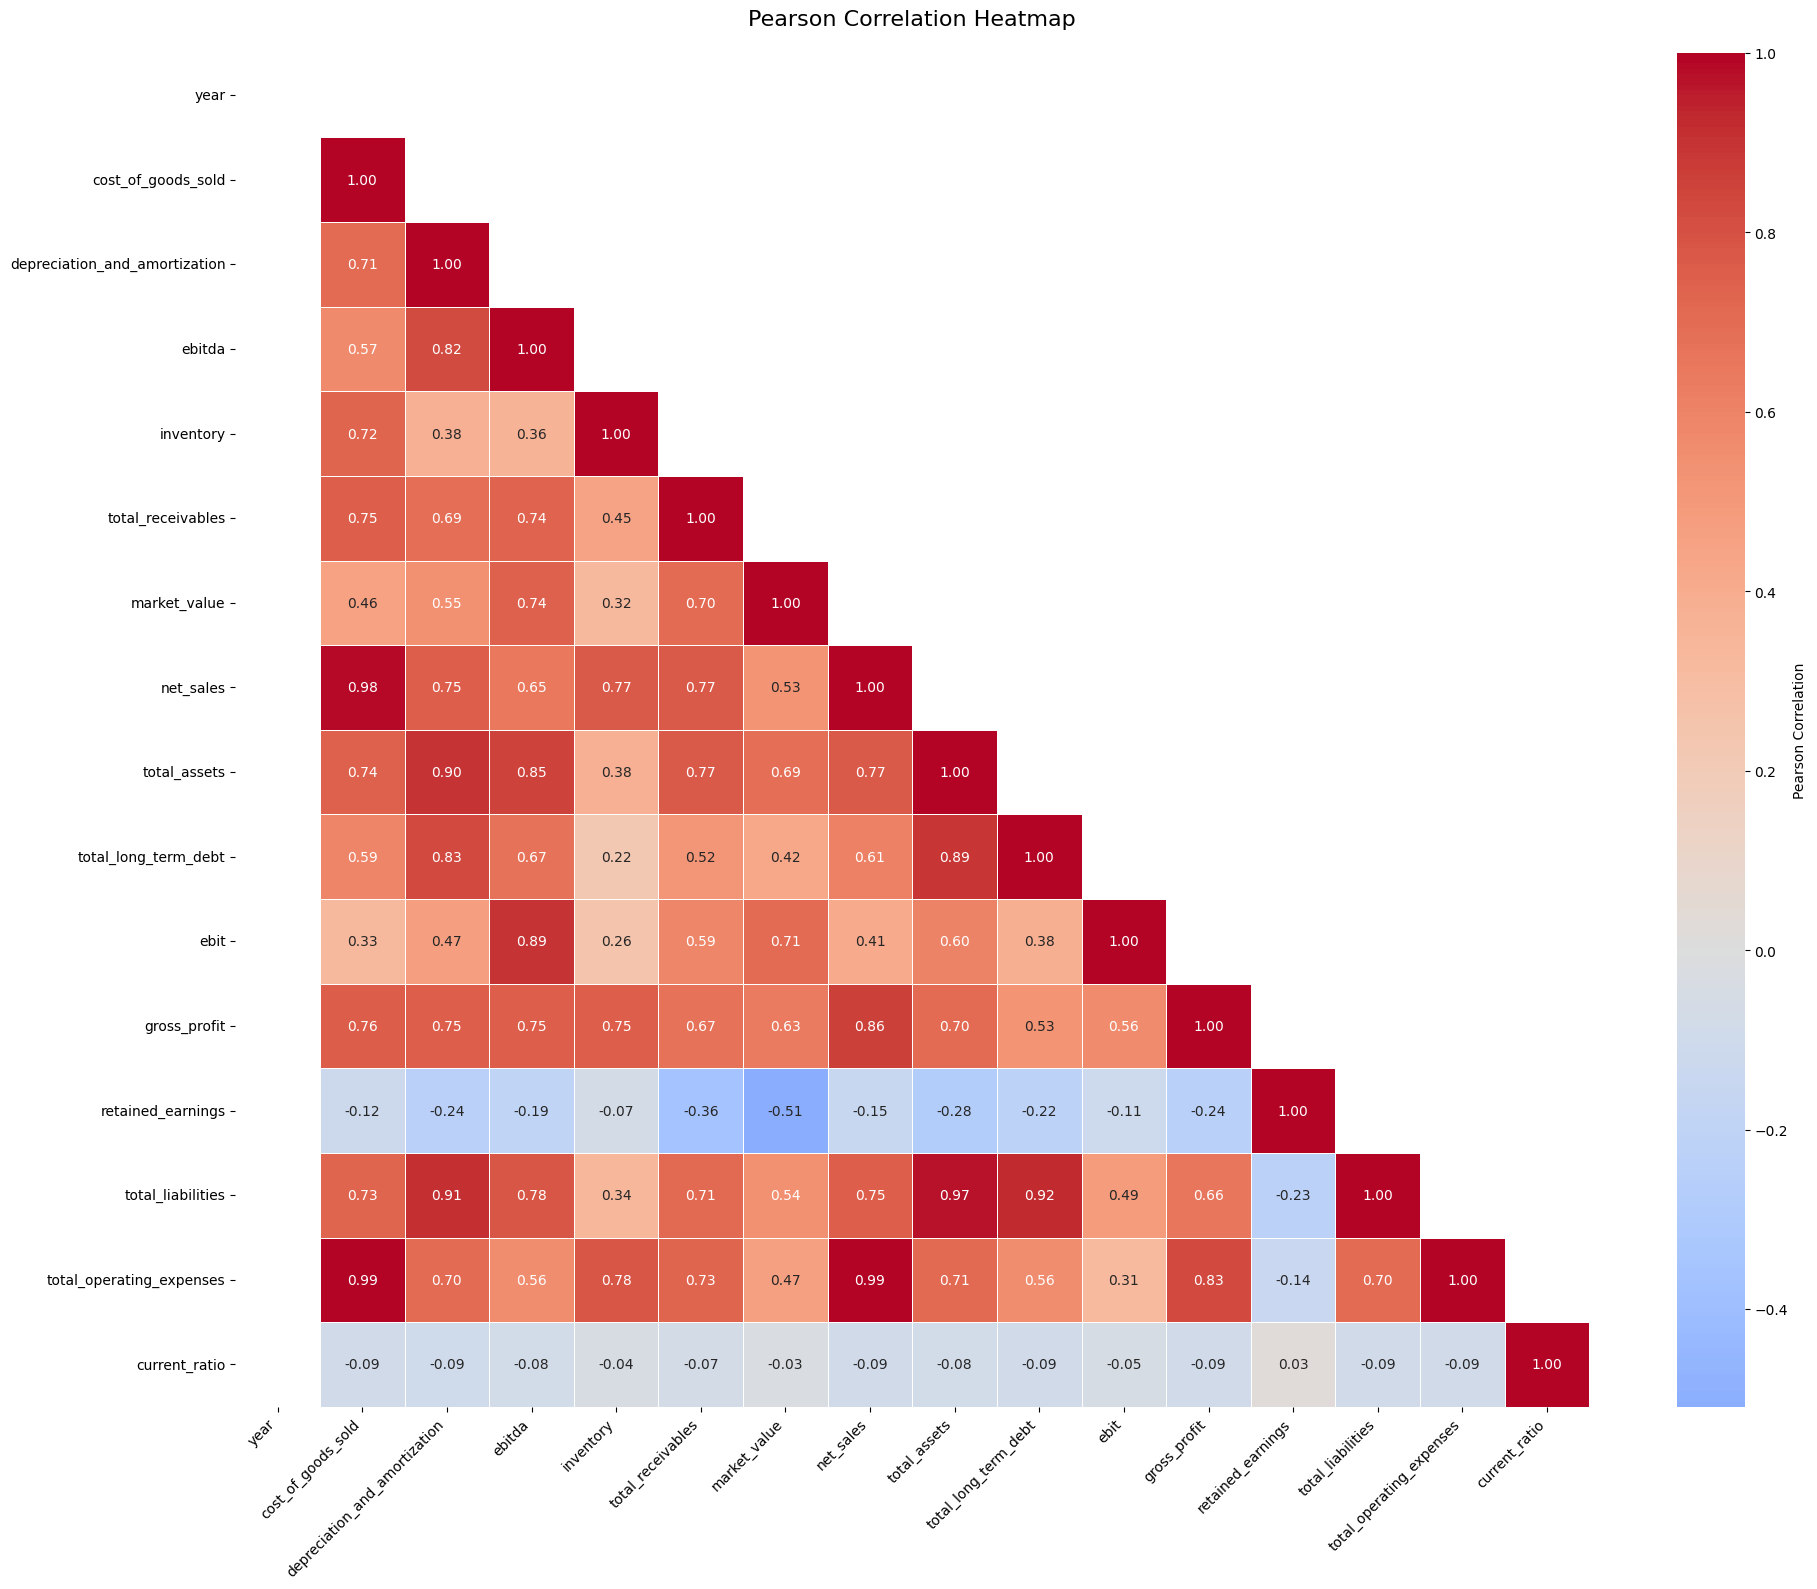

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = failed_companies.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Create mask for upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Pearson Correlation'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Pearson Correlation Heatmap', pad=20, size=16)
plt.tight_layout()

plt.show()

Analisis berdasarkan diagram korelasi tersebut
1. **Beban Operasional yang Tinggi:** </br>
`total_operating_expenses` memiliki korelasi yang sangat tinggi dengan `net_sales`. Ini menunjukkan bahwa biaya operasional meningkat seiring penjualan. Jika biaya operasional terlalu tinggi sehingga sulit bagi perusahaan untuk menghasilkan laba bersih yang cukup.

2. **Pengelolaan Laba Ditahan yang Tidak Optimal:**</br>
`retained_earnings` berkorelasi negatif dengan banyak variabel lain, menunjukkan bahwa perusahaan mungkin tidak berhasil menabung atau menginvestasikan kembali labanya secara efektif. Tanpa cukup cadangan atau investasi ulang, perusahaan akan mengalami kesulitan menghadapi tantangan finansial atau membiayai ekspansi.

3. **Profitabilitas yang Tidak Stabil:** </br>
Korelasi tinggi antara `net_sales`, `cost_of_goods_sold`, dan `gross_profit` Jika terjadi penurunan penjualan atau peningkatan biaya barang yang dijual (COGS), perusahaan bisa mengalami penurunan profitabilitas yang signifikan, mempercepat kebangkrutan.

## 2. Apakah perusahaan dengan gross profit di bawah rata-rata dan long term debt di atas rata-rata lebih cenderung mengalami kebangkrutan?

In [ ]:
filtered_companies = train[
    (train['gross_profit'] < train['gross_profit'].mean()) &
    (train['total_long_term_debt'] > train['total_long_term_debt'].mean())
]
filtered_companies

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
12,CKYBSREG,C_1,alive,2011,1662.408,80.333,222.693,599.752,324.879,485.2897,2074.498,2195.653,669.489,142.360,412.090,486.582,1329.631,1851.805,2.25,Low Profit Margin
13,C09WAA0Z,C_1,alive,2012,1714.500,108.600,245.200,582.900,315.400,790.0029,2167.100,2136.900,622.200,136.600,452.600,542.400,1217.400,1921.900,2.66,Low Profit Margin
14,C3QXZO66,C_1,alive,2013,1581.400,113.400,256.000,632.900,297.900,961.3080,2035.000,2199.500,564.300,142.600,453.600,616.700,1198.800,1779.000,2.78,Low Profit Margin
24,CBQQ0QYU,C_2,alive,2008,870.700,82.400,173.300,162.700,240.600,705.6420,1456.400,1921.000,650.700,90.900,585.700,-505.600,1006.800,1283.100,3.88,Low Profit Margin
25,CS48H2YS,C_2,alive,2009,600.500,66.400,84.700,131.100,200.300,805.6440,996.700,1343.600,651.000,18.300,396.200,-979.300,987.400,912.000,3.81,Low Profit Margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62865,CI6IV6XN,C_8959,failed,2007,72.580,149.919,242.197,0.000,71.098,537.2151,341.284,1648.442,1045.511,92.278,268.704,33.836,1251.316,99.087,1.07,Healthy Profit Margin
62866,C5AN550J,C_8959,failed,2008,151.545,315.565,465.237,0.000,142.896,1002.9640,643.232,2049.931,944.972,149.672,491.687,-227.069,1675.346,177.995,0.92,Low Profit Margin
62867,CKX1MB45,C_8959,failed,2009,704.596,231.842,-295.522,5.526,60.273,75.2804,433.830,1328.662,858.720,-527.364,-270.766,-477.370,1201.162,729.352,0.98,Low Profit Margin
62868,C45EVPUS,C_8959,failed,2010,146.829,205.127,302.435,4.805,77.534,799.0519,498.931,1566.491,772.082,97.308,352.102,-465.161,1129.930,196.496,0.75,Healthy Profit Margin


In [ ]:
print(f"Perusahaan yang failed: ", (filtered_companies['status_label'] == 'failed').sum())
print(f"Perusahaan yang Alive: ", (filtered_companies['status_label'] == 'alive').sum())

Perusahaan yang failed:  422
Perusahaan yang Alive:  2429


Berdasarkan dari data tersebut jumlah perusahaan yang tidak bangkrut lebih banyak dibanding perusahaan yang bangkrut. Maka dari itu perusahaan yang memiliki gross profit di bawah rata-rata dan long term debt di atas rata-rata cenderung tidak bangkrut

## 3. Bagaimana hubungan antara total operating expenses, total assets, dan gross profit terhadap market value dalam perusahaan?

In [ ]:
correlation = train[['market_value', 'total_operating_expenses', 'total_assets', 'gross_profit']].corr()
correlation

,market_value,total_operating_expenses,total_assets,gross_profit
market_value,1.000000,0.655469,0.791588,0.852560
total_operating_expenses,0.655469,1.000000,0.746548,0.815820
total_assets,0.791588,0.746548,1.000000,0.888621
gross_profit,0.852560,0.815820,0.888621,1.000000


Berdasarkan matriks korelasi ini, kita dapat melihat hubungan antara market value dan variabel lainnya:

Market value memiliki korelasi yang cukup tinggi dengan gross profit (0.85), total assets (0.79), dan total operating expenses (0.66). Ini menunjukkan bahwa ketika gross profit, total assets, atau total operating expenses meningkat, ada kecenderungan market value juga meningkat. Kesimpulannya market value memiliki hubungan yang kuat dengan gross profit, serta total assets dan total operating expenses.

## 4. Faktor-faktor apa yang mempengaruhi tingkat net profit margin perusahaan?

In [ ]:
train['net_profit_margin_category'] = train['net_profit_margin_category'].map({
    'Low Profit Margin': 0,
    'Healthy Profit Margin': 1,
    'High Profit Margin': 2
})
train.head()

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,CQZW3V9G,C_1,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,0
1,CIRJ6YT8,C_1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,0
2,CAHLFH0N,C_1,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,0
3,CBU4UE1T,C_1,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,0
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,0


In [ ]:
correlation_matrix = train.select_dtypes(include=[float, int]).corr()
correlation_npm = correlation_matrix['net_profit_margin_category'].sort_values(ascending=False)
correlation_npm

,net_profit_margin_category
net_profit_margin_category,1.000000
market_value,0.180679
ebit,0.170725
ebitda,0.158235
gross_profit,0.133256
total_assets,0.132676
retained_earnings,0.115553
total_liabilities,0.113091
total_long_term_debt,0.102686
total_receivables,0.101973


## Eksplorasi

### Tren kebangkrutan berdasarkan tahun.

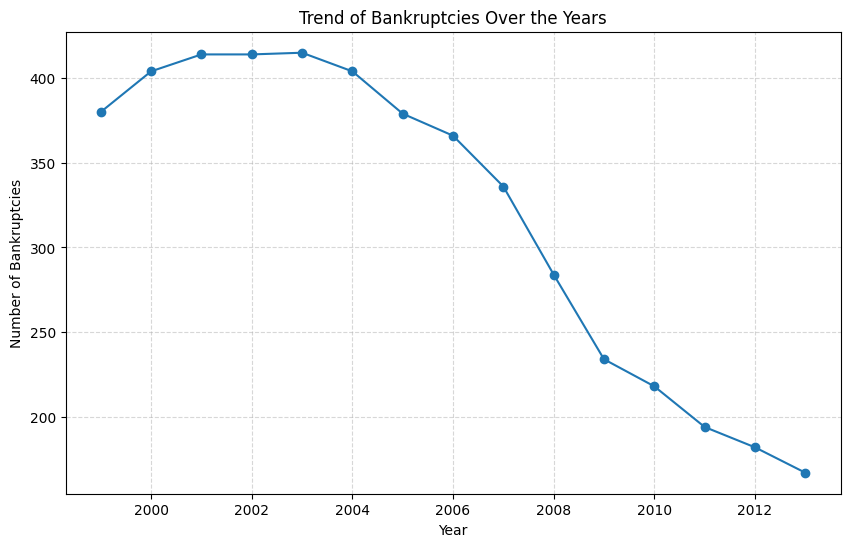

In [ ]:
import matplotlib.pyplot as plt

# Hitung banyaknya kebangkrutan per tahun
bankruptcy_trend = train[train['status_label'] == 'failed'].groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(bankruptcy_trend.index, bankruptcy_trend.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Bankruptcies')
plt.title('Trend of Bankruptcies Over the Years')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

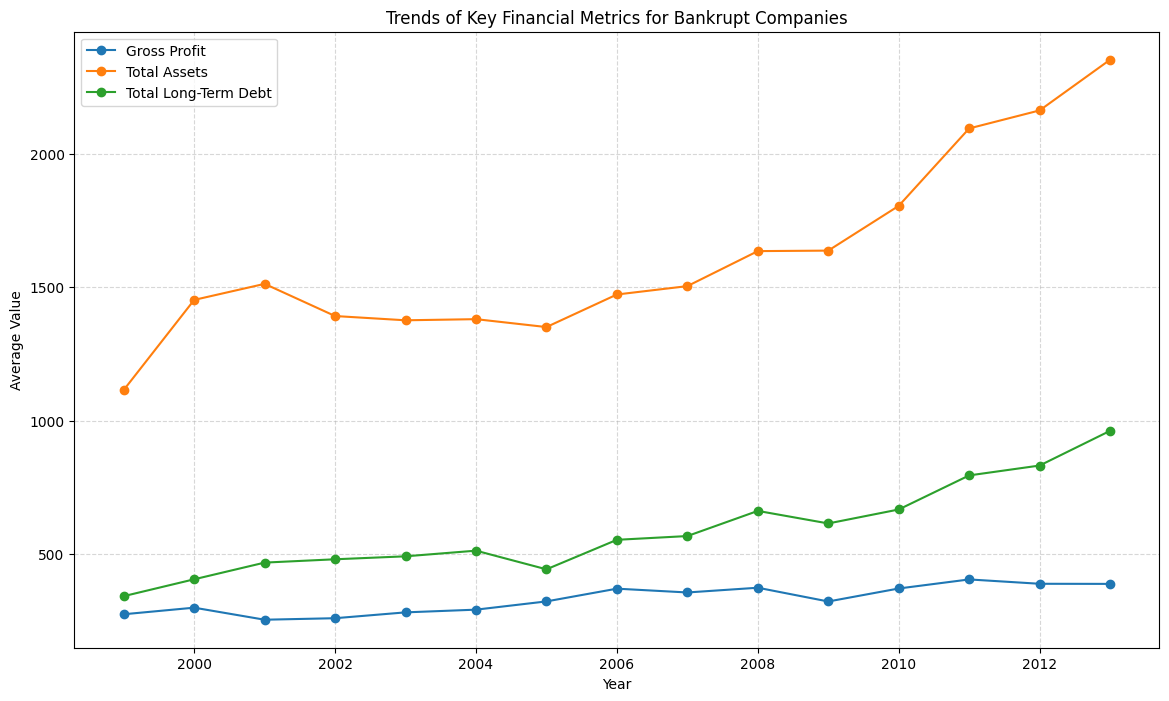

In [ ]:
import matplotlib.pyplot as plt

# Filter data untuk perusahaan yang bangkrut
failed_companies = train[train['status_label'] == 'failed'].select_dtypes(include=['float64', 'int64'])

# Menghitung rata-rata metrik keuangan per tahun untuk perusahaan yang bangkrut
average_metrics = failed_companies.groupby('year').mean()

plt.figure(figsize=(14, 8))

# Plot tren gross profit
plt.plot(average_metrics.index, average_metrics['gross_profit'], marker='o', label='Gross Profit')

# Plot tren total assets
plt.plot(average_metrics.index, average_metrics['total_assets'], marker='o', label='Total Assets')

# Plot tren total long-term debt
plt.plot(average_metrics.index, average_metrics['total_long_term_debt'], marker='o', label='Total Long-Term Debt')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Trends of Key Financial Metrics for Bankrupt Companies')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

#### Observasi

* Total Long-Term Debt: Meskipun terdapat tren peningkatan rata-rata utang jangka panjang di antara perusahaan yang bangkrut, hal ini tampaknya tidak memiliki korelasi yang kuat dengan penurunan jumlah kebangkrutan. Kenaikan utang yang konsisten menunjukkan bahwa meskipun perusahaan membawa lebih banyak utang, hal tersebut tidak selalu berujung pada kebangkrutan yang lebih tinggi seiring waktu.
* Total Assets: Peningkatan aset total menunjukkan bahwa perusahaan yang mengalami kebangkrutan sering kali merupakan perusahaan besar atau yang memiliki banyak aset, tetapi ini tidak berarti bahwa aset tersebut secara langsung menyebabkan kebangkrutan. Ini mungkin menunjukkan bahwa industri tertentu atau perusahaan besar lebih rentan terhadap tantangan keuangan.
* Gross Profit: Tren gross profit yang relatif datar di antara perusahaan yang **bangkrut** menunjukkan bahwa masalah profitabilitas tetap ada, dan memperbaiki margin laba kotor mungkin merupakan tantangan yang sulit.







#### Kesimpulan
* Data menunjukkan bahwa stagnasi laba kotor mungkin memiliki dampak yang lebih signifikan terhadap risiko kebangkrutan dibandingkan dengan tingkat utang jangka panjang. Meskipun perusahaan membawa lebih banyak utang dari waktu ke waktu, mereka mungkin berhasil mengelola utang tersebut dengan cara yang tidak langsung menyebabkan kegagalan, kemungkinan karena kondisi ekonomi yang menguntungkan atau strategi keuangan yang mengurangi risiko utang.
* Penurunan jumlah kebangkrutan dari waktu ke waktu mungkin lebih terkait dengan faktor ekonomi eksternal atau perbaikan kondisi pasar secara keseluruhan, daripada faktor internal seperti utang.

### Karakteristik perusahaan yang bertahan pada tahun dengan jumlah kebangkrutan tertinggi

In [ ]:
# perusahaan yang bangkrut pada tahun dengan jumlah kebangkrutan yang tinggi
# Count number of failed companies by year
failed_by_year = train[train['status_label'] == 'failed'].groupby('year').size()

# Get the year with maximum failures
year_max_failures = failed_by_year.idxmax() #2003

# Filter surviving companies in that specific year
surviving_companies = train[
    (train['status_label'] == 'alive') &
    (train['year'] == year_max_failures)
]
surviving_companies

,ID,company_name,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
4,C0DQ4A9M,C_1,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,0
19,C11CD7LX,C_2,alive,2003,422.600,59.200,19.900,69.500,141.200,2072.9620,773.200,1296.900,400.000,-39.300,350.600,-771.200,669.200,753.300,3.79,0
40,C9G79RBC,C_4,alive,2003,729.995,49.681,155.228,309.277,258.471,1045.8834,1297.285,2329.268,782.249,105.547,567.290,72.500,1197.279,1142.057,1.93,0
62,C7J2Y20C,C_7,alive,2003,55.201,1.192,2.556,4.915,11.398,16.4753,68.159,41.154,13.388,1.364,12.958,-6.603,33.124,65.603,1.25,0
77,C6228TE2,C_8,alive,2003,163.447,14.677,29.472,74.738,65.243,461.7062,291.780,330.616,10.956,14.795,128.333,29.474,72.201,262.308,4.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62595,CVMT11GE,C_8913,alive,2003,13.969,3.010,-21.161,2.744,5.736,331.8662,38.262,267.101,0.000,-24.171,24.293,-152.214,20.009,59.423,15.79,0
62616,CWALG2FJ,C_8919,alive,2003,8.021,1.645,-0.677,4.069,3.861,63.7997,19.595,31.268,3.121,-2.322,11.574,-39.524,11.965,20.272,2.45,0
62633,CJI3DDAC,C_8921,alive,2003,2.587,1.657,-7.553,0.831,1.501,43.2948,14.088,28.089,1.157,-9.210,11.501,-50.335,13.180,21.641,3.77,0
62704,CLEZSDNC,C_8930,alive,2003,22.573,0.681,5.804,8.545,27.894,158.1070,49.055,49.726,3.100,5.123,26.482,-8.386,12.494,43.251,4.30,1


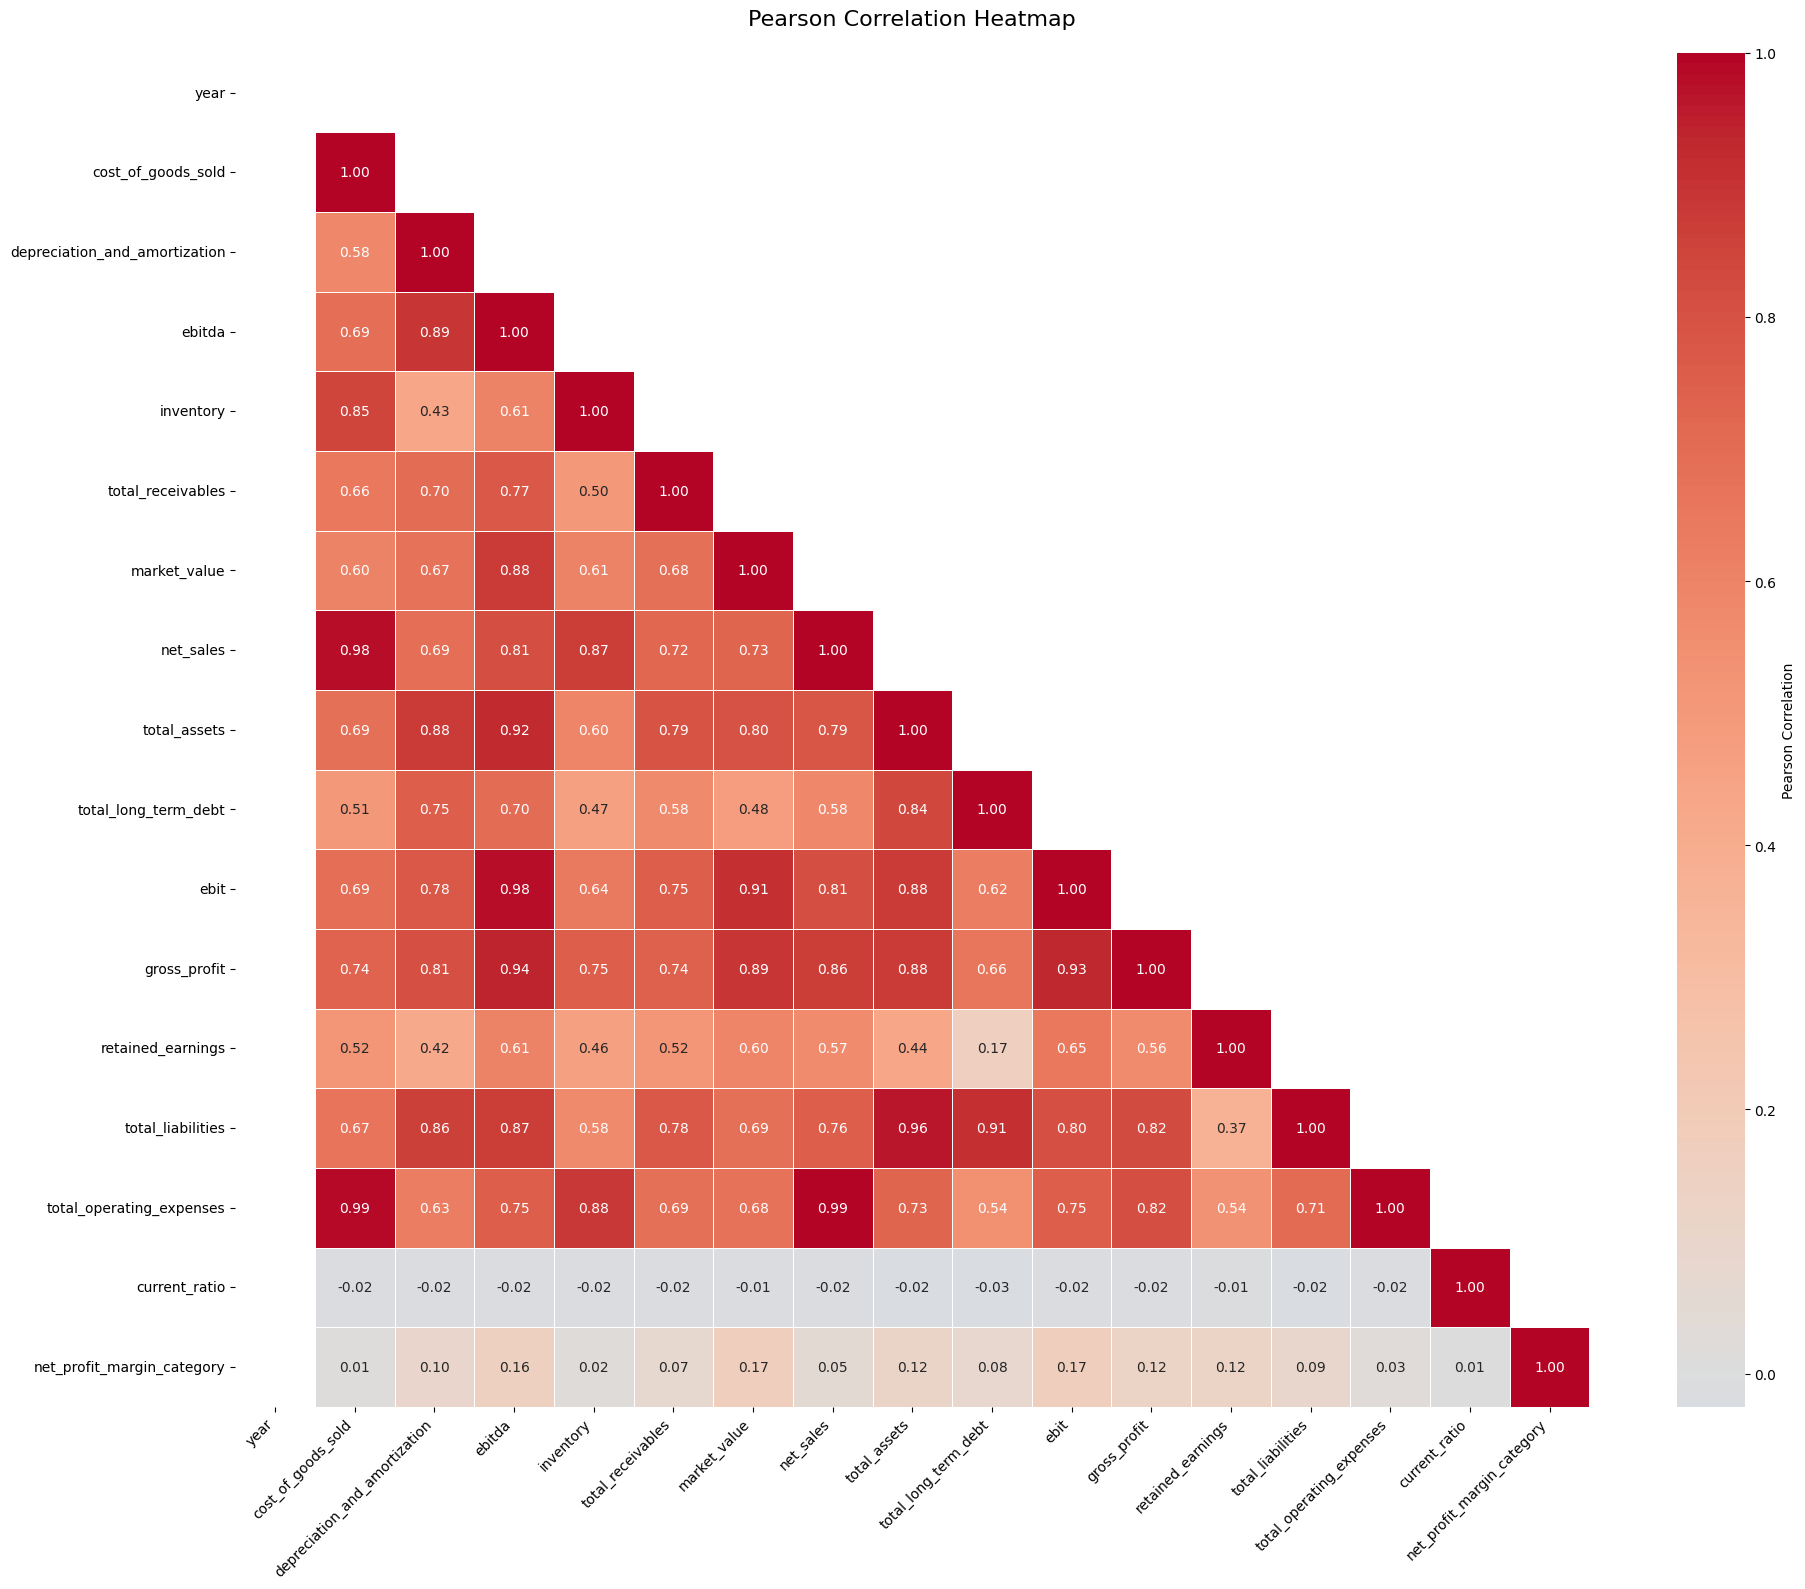

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = surviving_companies.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Create mask for upper triangle
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Pearson Correlation'})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Pearson Correlation Heatmap', pad=20, size=16)
plt.tight_layout()

plt.show()

Analisis berdasarkan diagram korelasi tersebut: <br>
Perusahaan yang cenderung bertahan dibanding perusahaan yang bangkrut adalah fitur "retained_earnings" yang cenderung berkorelasi positif dengan semua fitur lainnya.

### Karakteristik pengaruh terhadap suatu nama company

In [ ]:
import pandas as pd

# Load the training data
train = pd.read_csv('company_train.csv', index_col='ID')
df_regress = train.copy()

# Calculate the number of unique company names
num_unique_companies = df_regress['company_name'].nunique()

# Calculate the total number of rows in the DataFrame
total_rows = len(df_regress)

# Compute the ratio
unique_to_total_ratio = num_unique_companies / total_rows

# Display the results
print(f"Number of Unique Company Names: {num_unique_companies}")
print(f"Total Number of Rows: {total_rows}")
print(f"Ratio of Unique Company Names to Total Rows: {unique_to_total_ratio:.4f}")


Number of Unique Company Names: 8238
Total Number of Rows: 62896
Ratio of Unique Company Names to Total Rows: 0.1310

Terlihat rasio jumlah notebook sangat kecil, artinya banyak pengulangan nama company, sehingga data pada fitur company_name ada kemungkinan berpengaruh terhadap performa model.

# Modeling

## Classification


### Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = train.copy()
status_label_map = {'failed': 0, 'alive': 1}
df['status_label'] = df['status_label'].map(status_label_map)

In [ ]:
X = df.drop(['net_profit_margin_category', 'ID', 'company_name', 'retained_earnings'], axis=1)
y = df['net_profit_margin_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2024)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Mutual Information Classifier
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

mi.sort_values(ascending=False)

,0
ebit,0.158400
ebitda,0.130879
market_value,0.080772
gross_profit,0.067764
total_assets,0.047908
net_sales,0.045239
total_receivables,0.043917
depreciation_and_amortization,0.036777
cost_of_goods_sold,0.030633
total_long_term_debt,0.030100


### List of models with Oversampling and Undersampling

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_with_sampling(estimator, X, y, oversampler=None, undersampler=None, n_splits=5, random_state=42):
    label_mapping = {'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2}
    y = y.replace(label_mapping)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        if oversampler:
            try:
                X_train, y_train = oversampler.fit_resample(X_train, y_train)
            except ValueError:
                print(f"Skipping oversampling for fold {fold_idx} due to insufficient data.")

        if undersampler:
            X_train, y_train = undersampler.fit_resample(X_train, y_train)

        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred, average='macro'))
        metrics['recall'].append(recall_score(y_test, y_pred, average='macro'))
        metrics['f1_score'].append(f1_score(y_test, y_pred, average='macro'))

    results = {metric: np.mean(values) for metric, values in metrics.items()}
    return results

In [ ]:
# Model Definitions
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
}

In [ ]:
results_no_sampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} without sampling...")
    result = evaluate_model_with_sampling(model, X, y, n_splits=5)
    result['Sampling'] = 'No Sampling'
    result['Model'] = model_name
    results_no_sampling.append(result)

results_no_sampling_df = pd.DataFrame(results_no_sampling)

results_no_sampling_df

Evaluating Random Forest without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating XGBoost without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


Evaluating LightGBM without sampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score -0.398099
[LightGBM] [Info] Start training from score -1.818099
[LightGBM] [Info] Start training from score -1.795343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50317, number of used features: 16
[LightGBM] [Info] Start training from score -0.398119
[LightGBM] [Info] Start training from score -1.818119
[LightGBM] [Info] Start training from score -1.795243
[LightGBM] [Info] Auto-choosing ro

<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


,accuracy,precision,recall,f1_score,Sampling,Model
0,0.862408,0.804078,0.772434,0.787031,No Sampling,Random Forest
1,0.859053,0.798667,0.764258,0.779984,No Sampling,XGBoost
2,0.859896,0.797808,0.769572,0.782688,No Sampling,LightGBM
3,0.843058,0.781639,0.727655,0.750429,No Sampling,CatBoost


In [ ]:
from imblearn.over_sampling import SMOTE

# Evaluasi Dengan Oversampling
oversampler = SMOTE(random_state=42)

results_oversampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with oversampling...")
    result = evaluate_model_with_sampling(model, X, y, oversampler=oversampler, n_splits=5)
    result['Sampling'] = 'Oversampling'
    result['Model'] = model_name
    results_oversampling.append(result)

results_oversampling_df = pd.DataFrame(results_oversampling)

results_oversampling_df

Evaluating Random Forest with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating XGBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

Evaluating LightGBM with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 101376, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with oversampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.853345,0.780015,0.798234,0.787616,Oversampling,Random Forest
1,0.821149,0.748023,0.790066,0.760953,Oversampling,XGBoost
2,0.828701,0.753314,0.793566,0.767129,Oversampling,LightGBM
3,0.796728,0.727103,0.776170,0.738315,Oversampling,CatBoost


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Evaluasi Dengan Undersampling
undersampler = RandomUnderSampler(random_state=42)

results_undersampling = []
for model_name, model in models.items():
    print(f"Evaluating {model_name} with undersampling...")
    result = evaluate_model_with_sampling(model, X, y, undersampler=undersampler, n_splits=5)
    result['Sampling'] = 'Undersampling'
    result['Model'] = model_name
    results_undersampling.append(result)

results_undersampling_df = pd.DataFrame(results_undersampling)

results_undersampling_df

Evaluating Random Forest with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating XGBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

Evaluating LightGBM with undersampling...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 24504, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Evaluating CatBoost with undersampling...


<ipython-input-23-a9aa4d8dfb9d>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

,accuracy,precision,recall,f1_score,Sampling,Model
0,0.824107,0.751693,0.796455,0.765309,Undersampling,Random Forest
1,0.813518,0.743896,0.791015,0.755908,Undersampling,XGBoost
2,0.818081,0.746868,0.794997,0.760411,Undersampling,LightGBM
3,0.784422,0.718874,0.770430,0.727774,Undersampling,CatBoost


### LightGBM

In [ ]:
# Mapping label
y_mapped = y.replace({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})

<ipython-input-36-a82527763ace>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_mapped = y.replace({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_mapped)
class_weights = compute_class_weight('balanced', classes=classes, y=y_mapped)
weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", weight_dict)

Class Weights: {0: 0.49633838383838386, 1: 2.053411687887692, 2: 2.007020231029421}


In [ ]:
weights = y_mapped.map(weight_dict)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# # train_data = lgb.Dataset(X_train_resampled, label=y_train_resampled)
# train_data = lgb.Dataset(X_train, label=y_train)
# test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train, weight=weights.loc[y_train.index])
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
from lightgbm.callback import early_stopping

params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'random_state': 42
}

print("Training LightGBM model...")
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    callbacks=[early_stopping(stopping_rounds=10)]
)

Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score -1.098963
[LightGBM] [Info] Start training from score -1.095485
[LightGBM] [Info] Start training from score -1.101397
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	train's multi_logloss: 0.433511	valid's multi_logloss: 0.458871


In [ ]:
y_test_pred = lgbm_model.predict(X_test)
y_test_pred_class = y_test_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      8454
           1       0.54      0.79      0.64      2015
           2       0.77      0.75      0.76      2111

    accuracy                           0.83     12580
   macro avg       0.75      0.80      0.77     12580
weighted avg       0.86      0.83      0.84     12580



In [ ]:
accuracy = accuracy_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8255
F1-Score: 0.7668


**Public Score Kaggle**
- Not Weighted : 0.85527
- Weighted : 0.82548


### LightBM dengan Approach Moving Average

Pertama tama kita siapkan library dan data yang diperlukan

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import *
from xgboost import XGBClassifier
from sklearn.feature_selection import *
from catboost import CatBoostClassifier
import lightgbm as lgb


df = pd.read_csv('company_train.csv').drop(["ID", "retained_earnings"], axis=1)

df.info()

Lakukan encoding pada fitur fitur, termasuk fitur target, yang masih merupakan fitur kategorikal

In [ ]:
df['net_profit_margin_category'] = df['net_profit_margin_category'].map({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})

Penambahan fitur moving average berdasarkan fitur-fitur yang ada

In [ ]:
anchor1 = "gross_profit"
anchor2 = "market_value"
anchor3 = "gross_profit"
anchor4 = "total_long_term_debt"

rolling_n = 3
df[f'{anchor1}_moving_avg'] = df.groupby('company_name')[anchor1].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor2}_moving_avg'] = df.groupby('company_name')[anchor2].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor3}_moving_avg'] = df.groupby('company_name')[anchor3].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor4}_moving_avg'] = df.groupby('company_name')[anchor4].transform(lambda x: x.rolling(rolling_n, 1).mean())
df.drop('company_name', axis=1, inplace=True)

In [ ]:
print(len(df[df["net_profit_margin_category"] == 0].index))
print(len(df[df["net_profit_margin_category"] == 1].index))
print(len(df[df["net_profit_margin_category"] == 2].index))

Visualisasi multikolinearitas data

In [ ]:
columns_checked = df.columns.difference(["net_profit_margin_category", anchor1, "status_label", "current_ratio"])

for c in columns_checked:
    a = c
    b = anchor1

    data = df[[a, b, "net_profit_margin_category"]]
    display(data)

    plt.figure(figsize=(8, 6))
    plt.scatter(data[data["net_profit_margin_category"] == 3][a],data[data["net_profit_margin_category"] == 3][b], label='High Profit Margin', alpha=0.5)
    plt.scatter(data[data["net_profit_margin_category"] == 2][a],data[data["net_profit_margin_category"] == 2][b], label='Healthy Profit Margin', alpha=0.5)
    plt.scatter(data[data["net_profit_margin_category"] == 1][a],data[data["net_profit_margin_category"] == 1][b], label='Low Profit Margin', alpha=0.5)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.legend()
    plt.show()

    break

In [ ]:
no_year_all_numerics = df.drop(["year", "net_profit_margin_category"], axis=1)

corr = no_year_all_numerics.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Persiapan training model

In [ ]:
X = df.drop(["net_profit_margin_category"], axis=1)
y = df["net_profit_margin_category"]

In [ ]:
kbest = SelectKBest(score_func=f_classif, k=15)

kbest.fit_transform(X, y)

X = X[kbest.get_feature_names_out()]

Hyperparameter tuning model

In [ ]:
paramslg = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves': 40,
    'max_depth': -1,
    'class_weight': {0: 1, 1: 1.25, 2: 1.25},
}

lgbm = lgb.LGBMClassifier(**paramslg, verbose=0)


Pengecekan cross validation dari model yang dibuat

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5)

display(cross_val_score(lgbm, X, y, cv=skf, scoring='accuracy', verbose=3).mean())
display(cross_val_score(lgbm, X, y, cv=skf, scoring='f1_macro', verbose=3).mean())

prediksi data

In [ ]:
test = pd.read_csv('company_test_classif.csv')

test_x = test.drop(["ID"], axis=1)
id = test["ID"]

test_x[f'{anchor1}_moving_avg'] = test_x.groupby('company_name')[anchor1].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor2}_moving_avg'] = test_x.groupby('company_name')[anchor2].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor3}_moving_avg'] = test_x.groupby('company_name')[anchor3].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor4}_moving_avg'] = test_x.groupby('company_name')[anchor4].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x.drop('company_name', axis=1, inplace=True)

test_x['status_label'] = test_x['status_label'].map({'alive': 1, 'failed': 0})

lgbm.fit(X, y)

y = pd.Series(lgbm.predict(test_x[X.columns])).map({0: 'Low Profit Margin', 1: 'Healthy Profit Margin', 2: 'High Profit Margin'})

prediction = pd.concat([id, y], axis=1).rename(columns={0: 'net_profit_margin_category'})

display(prediction)

prediction.to_csv('submit.csv', index=False)

Bandingkan dengan top-scorer sebelunya

In [ ]:
s1 = pd.read_csv('submit.csv')
s2 = pd.read_csv('85.csv')

s1.compare(s2)

### Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
def evaluate_classifier_performance(classifier, prediction, X_test, y_test):
    print("Hasil Evaluasi:\n\n%s\n" % classification_report(y_test, prediction))
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print("\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, values_format='d')

Hasil Evaluasi:

                       precision    recall  f1-score   support

Healthy Profit Margin       0.52      0.53      0.52      2015
   High Profit Margin       0.64      0.64      0.64      2111
    Low Profit Margin       0.89      0.88      0.89      8454

             accuracy                           0.79     12580
            macro avg       0.68      0.69      0.68     12580
         weighted avg       0.79      0.79      0.79     12580


Accuracy: 0.786248012718601
Precision Macro Average: 0.6830708200174153
Precision Micro Average: 0.786248012718601
Recall Macro Average: 0.6859642959404214
Recall Micro Average: 0.786248012718601
F1 Macro Average: 0.6844708867931241
F1 Micro Average: 0.786248012718601

Confusion Matrix



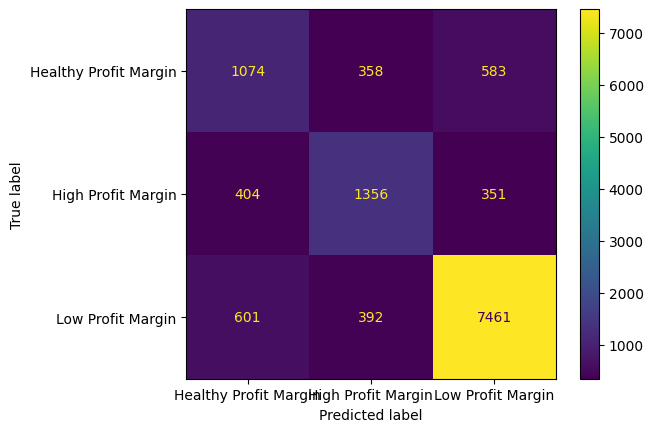

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
dt_prediction = dt_classifier.predict(X_test)
evaluate_classifier_performance(dt_classifier, dt_prediction, X_test, y_test)


### Random Forest


#### Feature Engineering
Membuat fungsi fitur-fitur baru berdasarkan informasi pada fitur yang berkorelasi.

In [ ]:

def create_new_features(df):
    # Avoid division by zero
    df['net_sales'].replace(0, 1e-6, inplace=True)
    df['total_assets'].replace(0, 1e-6, inplace=True)
    df['total_assets_minus_liabilities'] = df['total_assets'] - df['total_liabilities']
    df['total_assets_minus_liabilities'].replace(0, 1e-6, inplace=True)
    df['total_receivables'].replace(0, 1e-6, inplace=True)

    # Gross Profit Margin
    df['gross_profit_margin'] = df['gross_profit'] / df['net_sales']

    # EBITDA Margin
    df['ebitda_margin'] = df['ebitda'] / df['net_sales']

    # EBIT Margin
    df['ebit_margin'] = df['ebit'] / df['net_sales']

    # Asset Turnover
    df['asset_turnover'] = df['net_sales'] / df['total_assets']

    # Debt-to-Equity Ratio
    df['debt_to_equity'] = df['total_liabilities'] / df['total_assets_minus_liabilities']

    # Receivables Turnover
    df['receivables_turnover'] = df['net_sales'] / df['total_receivables']

    # Operating Expense Ratio
    df['operating_expense_ratio'] = df['total_operating_expenses'] / df['net_sales']

    # Depreciation and Amortization Ratio
    df['depreciation_amortization_ratio'] = df['depreciation_and_amortization'] / df['total_assets']

    # Drop intermediate columns if not needed
    df.drop(['total_assets_minus_liabilities'], axis=1, inplace=True)

    return df

In [ ]:
df = pd.read_csv('company_train.csv').drop(["ID", "retained_earnings"], axis=1)
df['net_profit_margin_category'] = df['net_profit_margin_category'].map({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
df.info()

Untuk menghindari overfit, fitur company_name di hapus

In [ ]:
df = create_new_features(df)
df.drop('company_name', axis=1, inplace=True)

In [ ]:
print(len(df[df["net_profit_margin_category"] == 0].index))
print(len(df[df["net_profit_margin_category"] == 1].index))
print(len(df[df["net_profit_margin_category"] == 2].index))

42240
10210
10446

In [ ]:
X = pd.get_dummies(
    df.drop(columns=[ 'net_profit_margin_category']),
    drop_first=True
)
y = df["net_profit_margin_category"]

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=135,
    max_depth=20,
class_weight= {0: 1, 1: 1.25, 2: 1.25},
)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5)

display(cross_val_score(rfc, X, y, cv=skf, scoring='accuracy', verbose=3).mean())
display(cross_val_score(rfc, X, y, cv=skf, scoring='f1_macro', verbose=3).mean())

[CV] END ................................ score: (test=0.838) total time=  50.7s
[CV] END ................................ score: (test=0.856) total time=  47.8s
[CV] END ................................ score: (test=0.861) total time=  46.0s
[CV] END ................................ score: (test=0.853) total time=  47.0s
[CV] END ................................ score: (test=0.855) total time=  46.1s

0.8528207584978673

[CV] END ................................ score: (test=0.772) total time=  46.5s
[CV] END ................................ score: (test=0.787) total time=  45.9s
[CV] END ................................ score: (test=0.781) total time=  46.6s
[CV] END ................................ score: (test=0.764) total time=  46.3s

0.776

In [ ]:
test = pd.read_csv('company_test_classif.csv')

test_x_ori = test.drop(["ID"], axis=1)
id = test["ID"]

test_x = test_x_ori.copy()
test_x['status_label'] = test_x_ori['status_label'].map({'alive': 1, 'failed': 0})
test_x = create_new_features(test_x)

test_x.drop('company_name', axis=1, inplace=True)

rfc.fit(X, y)

y = pd.Series(rfc.predict(test_x)).map({0: 'Low Profit Margin', 1: 'Healthy Profit Margin', 2: 'High Profit Margin'})

prediction = pd.concat([id, y], axis=1).rename(columns={0: 'net_profit_margin_category'})

display(prediction)

prediction.to_csv('submit_rfc_pesol_2.csv', index=False)

## Regression

### Feature Selection

In [ ]:
test_regress = pd.read_csv("company_test_regress.csv")

In [ ]:
df_regress = train.copy()
status_label_map = {'failed': 0, 'alive': 1}
df_regress['status_label'] = df_regress['status_label'].map(status_label_map)

In [ ]:
X = df_regress.drop(['net_profit_margin_category', 'ID', 'company_name', 'retained_earnings'], axis=1)
y = df_regress['retained_earnings']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X, y)
mi = pd.Series(mi)
mi.index = X.columns

mi.sort_values(ascending=False)

,0
ebitda,0.783265
ebit,0.766494
total_assets,0.710837
gross_profit,0.689037
net_sales,0.615150
total_operating_expenses,0.577703
market_value,0.572889
depreciation_and_amortization,0.567839
total_liabilities,0.552364
cost_of_goods_sold,0.516756


### List of model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {'MSE': mse, 'MAE': mae, 'R2': r2}

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results = []
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    metrics = evaluate_regression_model(model, X_train, X_test, y_train, y_test)
    metrics['Model'] = model_name
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df

Evaluating Linear Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115
Evaluating CatBoost...


,MSE,MAE,R2,Model
0,1.157820e+07,580.525063,0.501549,Linear Regression
1,1.599812e+07,553.238625,0.311267,Decision Tree
2,7.438927e+06,390.562107,0.679748,Random Forest
3,9.458192e+06,416.361290,0.592817,XGBoost
4,7.216484e+06,448.049326,0.689324,LightGBM
5,8.646892e+06,462.496923,0.627744,CatBoost


### LightGBM

In [ ]:
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10, 20],
    'n_estimators': [50, 100, 200]
}

lgbm = LGBMRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}
Best R² Score: 0.7014364634962034


In [ ]:
best_lgbm = grid_search.best_estimator_
best_lgbm.fit(X_train, y_train)

y_test_pred = best_lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3588
[LightGBM] [Info] Number of data points in the train set: 50316, number of used features: 16
[LightGBM] [Info] Start training from score 421.040115


In [ ]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 6935807.5649
Mean Absolute Error (MAE): 438.1451
R² Score: 0.7014


### XGBoost

In [ ]:
X = df_regress.drop(columns=['ID', 'retained_earnings'])
y = df_regress['retained_earnings']

In [ ]:
selector = SelectKBest(f_classif, k=12)  # Adjust k to match common features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X_test = df_test[selected_features]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

# Validation predictions
y_val_pred_xgb = xgb_regressor.predict(X_val_scaled)

# Metrics
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("R^2 Score:", r2_xgb)

MAE: 419.6941489441686
MSE: 6789169.56018823
R^2 Score: 0.7077205770460561


### ExtraTreeRegression dengan approach one-hot-encoding company dan feature engineering (similar to feature engineering in random forest)

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import r2_score

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn import linear_model, ensemble, naive_bayes
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import f1_score


from catboost import CatBoostRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
RANDOM_SEED =42

Feature Engineering function similar to random forest

In [ ]:

def create_new_features(df):
    # Avoid division by zero
    df['net_sales'].replace(0, 1e-6, inplace=True)
    df['total_assets'].replace(0, 1e-6, inplace=True)
    df['total_assets_minus_liabilities'] = df['total_assets'] - df['total_liabilities']
    df['total_assets_minus_liabilities'].replace(0, 1e-6, inplace=True)
    df['total_receivables'].replace(0, 1e-6, inplace=True)

    # Gross Profit Margin
    df['gross_profit_margin'] = df['gross_profit'] / df['net_sales']

    # EBITDA Margin
    df['ebitda_margin'] = df['ebitda'] / df['net_sales']

    # EBIT Margin
    df['ebit_margin'] = df['ebit'] / df['net_sales']

    # Asset Turnover
    df['asset_turnover'] = df['net_sales'] / df['total_assets']

    # Debt-to-Equity Ratio
    df['debt_to_equity'] = df['total_liabilities'] / df['total_assets_minus_liabilities']

    # Receivables Turnover
    df['receivables_turnover'] = df['net_sales'] / df['total_receivables']

    # Operating Expense Ratio
    df['operating_expense_ratio'] = df['total_operating_expenses'] / df['net_sales']

    # Depreciation and Amortization Ratio
    df['depreciation_amortization_ratio'] = df['depreciation_and_amortization'] / df['total_assets']

    # Drop intermediate columns if not needed
    df.drop(['total_assets_minus_liabilities'], axis=1, inplace=True)

    return df

In [ ]:
import pandas as pd
import numpy as np


train = pd.read_csv('company_train.csv', index_col='ID')
df_regress = train.copy()


status_mapping = {'alive': 1, 'failed': 0}
df_regress['status_label'] = df_regress['status_label'].map(status_mapping)


df_regress = create_new_features(df_regress)

X_reg = pd.get_dummies(
    df_regress.drop(columns=['retained_earnings', 'net_profit_margin_category']),
    drop_first=True
)


y_reg = df_regress['retained_earnings']

print("Features used for training:")
print(X_reg.columns.tolist())

X_test_ori = pd.read_csv("company_test_regress.csv", index_col='ID')


X_test_ori['status_label'] = X_test_ori['status_label'].map(status_mapping)

X_test_ori = create_new_features(X_test_ori)

X_test_final = pd.get_dummies(
    X_test_ori,
    drop_first=True
)


X_reg, X_test_final = X_reg.align(X_test_final, join='left', axis=1, fill_value=0)

missing_cols = set(X_reg.columns) - set(X_test_final.columns)
for col in missing_cols:
    X_test_final[col] = 0

X_test_final = X_test_final[X_reg.columns]

print("Final test features shape:", X_test_final.shape)



Zoo Of Models

In [ ]:
models_reg = {
    'xgboost': xgb.XGBRegressor(random_state=RANDOM_SEED),
    'lightgbm': lgbm.LGBMRegressor(random_state=RANDOM_SEED, verbose=0),
    'random_forest': ensemble.RandomForestRegressor(random_state=RANDOM_SEED, n_jobs=-1),
    'hist_gradient_boosting': ensemble.HistGradientBoostingRegressor(random_state=RANDOM_SEED),
    'extra_trees': ensemble.ExtraTreesRegressor(random_state=RANDOM_SEED, n_jobs=-1),
    'catboost': cb.CatBoostRegressor(random_state=RANDOM_SEED, verbose=0),
    'ridge': make_pipeline(
        StandardScaler(),
        linear_model.Ridge()),
}

Custom Cross Val R2 Method

In [ ]:

from sklearn.model_selection import KFold
def cross_val_custom_r2(estimator, X, _y, n_splits=5, random_state=42):
    """
    Perform k-fold cross-validation and compute R² scores.

    Parameters:
    - estimator: scikit-learn compatible regressor.
    - X (pd.DataFrame): Feature matrix.
    - _y (pd.Series or array-like): Target vector.
    - n_splits (int): Number of folds for cross-validation.
    - random_state (int): Seed for reproducibility.

    Returns:
    - np.ndarray: Array of R² scores for each fold.
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    results = []

    y = _y

    for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, y_train)

        y_pred = estimator.predict(X_test)

        score = r2_score(y_test, y_pred)

        results.append(score)

        print(f"Fold {fold}: R² Score = {score:.4f}")

    return np.array(results)




Cross-Validating zoo of models

In [ ]:
scores = pd.DataFrame(index=models_reg.keys(), columns=['mean r2', 'var r2', 'fit time', 'fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'])

for name, model in models_reg.items():
    print(f"\nEvaluating {name}...")
    try:
        start_time = time.time()

        fold_scores = cross_val_custom_r2(model, X_reg, y_reg, n_splits=5, random_state=RANDOM_SEED)
        end_time = time.time()

        mean_r2 = fold_scores.mean()
        var_r2 = fold_scores.var()

        fit_time = end_time - start_time

        scores.loc[name] = [mean_r2, var_r2, fit_time, *fold_scores]

        print(f"{name} completed successfully.\n")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")
        scores.loc[name] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

display(scores.sort_values(by='mean r2', ascending=False))

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean r2</th>
      <th>var r2</th>
      <th>fit time</th>
      <th>fold 1</th>
      <th>fold 2</th>
      <th>fold 3</th>
      <th>fold 4</th>
      <th>fold 5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>extra_trees</th>
      <td>0.953839</td>
      <td>0.000127</td>
      <td>13145.915026</td>
      <td>0.975628</td>
      <td>0.947259</td>
      <td>0.948892</td>
      <td>0.944198</td>
      <td>0.953217</td>
    </tr>
    <tr>
      <th>xgboost</th>
      <td>0.946611</td>
      <td>0.00019</td>
      <td>423.653524</td>
      <td>0.954943</td>
      <td>0.925183</td>
      <td>0.963965</td>
      <td>0.951876</td>
      <td>0.937086</td>
    </tr>
    <tr>
      <th>catboost</th>
      <td>0.945056</td>
      <td>0.000137</td>
      <td>433.806422</td>
      <td>0.959861</td>
      <td>0.928861</td>
      <td>0.939724</td>
      <td>0.957115</td>
      <td>0.93972</td>
    </tr>
    <tr>
      <th>random_forest</th>
      <td>0.913426</td>
      <td>0.000357</td>
      <td>7334.193715</td>
      <td>0.948048</td>
      <td>0.892854</td>
      <td>0.901109</td>
      <td>0.914661</td>
      <td>0.910457</td>
    </tr>
    <tr>
      <th>ridge</th>
      <td>0.861055</td>
      <td>0.001526</td>
      <td>731.393552</td>
      <td>0.876502</td>
      <td>0.832603</td>
      <td>0.901614</td>
      <td>0.799544</td>
      <td>0.895011</td>
    </tr>
    <tr>
      <th>lightgbm</th>
      <td>0.757707</td>
      <td>0.003888</td>
      <td>103.621433</td>
      <td>0.695635</td>
      <td>0.68591</td>
      <td>0.749218</td>
      <td>0.818175</td>
      <td>0.839596</td>
    </tr>
    <tr>
      <th>hist_gradient_boosting</th>
      <td>0.699294</td>
      <td>0.00362</td>
      <td>889.618777</td>
      <td>0.692487</td>
      <td>0.661511</td>
      <td>0.721729</td>
      <td>0.799474</td>
      <td>0.621268</td>
    </tr>
  </tbody>
</table>
</div>

Didapat base model dengan performance paling tinggi yaitu extra_trees

#### Membuat Hyper-parameter Tuned XGBoosting dengan Optuna

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin


n_bins = 10  # Define the number of bins
y_binned = pd.qcut(y_reg, q=n_bins, duplicates='drop')


X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_binned
)

def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'random_state': RANDOM_SEED,
        'verbosity': 0,
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),

        'gamma': 0,           # Fixed at 0
        'min_child_weight': 1,  # Fixed at 1
        'reg_alpha': 0,      # Fixed at 0
        'reg_lambda': 1.0,   # Fixed at 1.0
    }

    model = xgb.XGBRegressor(
        **param,
        eval_set=[(X_test, y_test)],
        tree_method='auto'
    )


    scores = cross_val_score(
        model, X_train, y_train,
        scoring='r2',
        cv=3,
        n_jobs=-1,
        verbose=0
    )

    return scores.mean()

print("\n=== Starting Optuna Hyperparameter Optimization ===")
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=RANDOM_SEED))
study.optimize(objective, n_trials=10, timeout=None)  # You can set a timeout in seconds

print("\n=== Optuna Hyperparameter Optimization Completed ===")
print(f"Best Trial: {study.best_trial.number}")
print("Best Parameters:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")
print(f"Best R² Score: {study.best_trial.value:.4f}")


best_params = study.best_trial.params
best_params.update({
    'objective': 'reg:squarederror',
    'random_state': RANDOM_SEED,
    'verbosity': 0,
    'gamma': 0,
    'min_child_weight': 1,
    'reg_alpha': 0,
    'reg_lambda': 1.0
})


best_model = xgb.XGBRegressor(
    **best_params,
    eval_set=[(X_test, y_test)],
    tree_method='auto'
)


print("\nTraining the Best Model on the Entire Training Set...")
best_model.fit(X_train, y_train)


print("\n=== Evaluating the Best Model on the Test Set ===")
y_pred_best = best_model.predict(X_test)
test_r2_best = r2_score(y_test, y_pred_best)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Test R² Score: {test_r2_best:.4f}")
print(f"Test RMSE: {test_rmse_best:.4f}")



=== Optuna Hyperparameter Optimization Completed ===
Best Trial: 0
Best Parameters:
  n_estimators: 137
  max_depth: 8
  learning_rate: 0.14907884894416698
  subsample: 0.8394633936788146
  colsample_bytree: 0.6624074561769746
Best R² Score: 0.8832

Training the Best Model on the Entire Training Set...

=== Evaluating the Best Model on the Test Set ===
Test R² Score: 0.9190
Test RMSE: 1470.5498



#### Cross-Validating with whole Training Data

In [ ]:

print("\n=== Applying Custom Cross-Validation Function on Best Model ===")
custom_cv_scores = cross_val_custom_r2(best_model, X_reg, y_reg, n_splits=5, random_state=RANDOM_SEED)

print("\n=== Fold-wise R² Scores ===")
for fold_number, score in enumerate(custom_cv_scores, start=1):
    print(f"Fold {fold_number}: R² Score = {score:.4f}")

=== Applying Custom Cross-Validation Function on Best Model ===
Fold 1: R² Score = 0.9584
Fold 2: R² Score = 0.9053
Fold 3: R² Score = 0.9400
Fold 4: R² Score = 0.9290
Fold 5: R² Score = 0.9206

=== Fold-wise R² Scores ===
Fold 1: R² Score = 0.9584
Fold 2: R² Score = 0.9053
Fold 3: R² Score = 0.9400
Fold 4: R² Score = 0.9290
Fold 5: R² Score = 0.9206

0.9307

Didapat base model ExtraTreeRegressor lebih baik daripada hyperparameter-tuned XGBoostRegressor

In [ ]:
tuned_extratrees = ensemble.ExtraTreesRegressor(random_state=RANDOM_SEED, n_jobs=-1)
tuned_extratrees.fit(X_reg, y_reg)

Fit base model ExtraTrees (ignore nama variabel)


In [ ]:
y_pred_final = tuned_extratrees.predict(X_test_final)
X_test_ori = pd.read_csv("company_test_regress.csv")

submission = pd.DataFrame()
submission['ID'] = X_test_ori['ID']
submission['retained_earnings'] = y_pred_final

submission_filename = f'submission_tuned_regress.csv'
submission.to_csv(submission_filename, index=False)
print(f"Submission file saved as: {submission_filename}\n")


### ExtraTreeRegression dengan approach one-hot encoding ditambah moving average


Pertama-tama kita import modul yang diperlukan dan baca data yang ada

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import *
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import *
from xgboost import XGBClassifier
from sklearn.feature_selection import *
from catboost import CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb


df = pd.read_csv('company_train.csv').drop(["ID", "net_profit_margin_category"], axis=1)

df.info()

Kemudian, kita melakukan encoding terhadap fitur yang masih kategorikal

In [ ]:
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})

Tambahan dari approach sebelumnya, penambahan fitur moving average dari beberapa fitur-fitur yang ada

In [ ]:
anchor1 = "gross_profit"
anchor2 = "market_value"
anchor3 = "gross_profit"
anchor4 = "total_long_term_debt"

rolling_n = 3
df[f'{anchor1}_moving_avg'] = df.groupby('company_name')[anchor1].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor2}_moving_avg'] = df.groupby('company_name')[anchor2].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor3}_moving_avg'] = df.groupby('company_name')[anchor3].transform(lambda x: x.rolling(rolling_n, 1).mean())
df[f'{anchor4}_moving_avg'] = df.groupby('company_name')[anchor4].transform(lambda x: x.rolling(rolling_n, 1).mean())

Penambahan fitur seperti pada approach sebelumnya

In [ ]:
df['net_sales'] = df['net_sales'].replace(0, 1e-6)
df['total_assets'] = df['total_assets'].replace(0, 1e-6)
df['total_assets_minus_liabilities'] = df['total_assets_minus_liabilities'] = df['total_assets'] - df['total_liabilities']
df['total_assets_minus_liabilities'] = df['total_assets_minus_liabilities'].replace(0, 1e-6)
df['total_receivables'] = df['total_receivables'].replace(0, 1e-6)

df['gross_profit_margin'] = df['gross_profit'] / df['net_sales']
df['ebitda_margin'] = df['ebitda'] / df['net_sales']
df['ebit_margin'] = df['ebit'] / df['net_sales']
df['asset_turnover'] = df['net_sales'] / df['total_assets']
df['debt_to_equity'] = df['total_liabilities'] / df['total_assets_minus_liabilities']
df['receivables_turnover'] = df['net_sales'] / df['total_receivables']
df['operating_expense_ratio'] = df['total_operating_expenses'] / df['net_sales']
df['depreciation_amortization_ratio'] = df['depreciation_and_amortization'] / df['total_assets']
df.drop(['total_assets_minus_liabilities'], axis=1)

df = pd.get_dummies(df, columns=['company_name'])

In [ ]:
test = pd.read_csv('company_test_regress.csv')

test_x = test.drop(["ID"], axis=1)
id = test["ID"]

test_x[f'{anchor1}_moving_avg'] = test_x.groupby('company_name')[anchor1].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor2}_moving_avg'] = test_x.groupby('company_name')[anchor2].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor3}_moving_avg'] = test_x.groupby('company_name')[anchor3].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x[f'{anchor4}_moving_avg'] = test_x.groupby('company_name')[anchor4].transform(lambda x: x.rolling(rolling_n, 1).mean())
test_x['status_label'] = test_x['status_label'].map({'alive': 1, 'failed': 0})

test_x['net_sales'] = test_x['net_sales'].replace(0, 1e-6)
test_x['total_assets'] = test_x['total_assets'].replace(0, 1e-6)
test_x['total_assets_minus_liabilities'] = test_x['total_assets_minus_liabilities'] = test_x['total_assets'] - test_x['total_liabilities']
test_x['total_assets_minus_liabilities'] = test_x['total_assets_minus_liabilities'].replace(0, 1e-6)
test_x['total_receivables'] = test_x['total_receivables'].replace(0, 1e-6)

test_x['gross_profit_margin'] = test_x['gross_profit'] / test_x['net_sales']
test_x['ebitda_margin'] = test_x['ebitda'] / test_x['net_sales']
test_x['ebit_margin'] = test_x['ebit'] / test_x['net_sales']
test_x['asset_turnover'] = test_x['net_sales'] / test_x['total_assets']
test_x['debt_to_equity'] = test_x['total_liabilities'] / test_x['total_assets_minus_liabilities']

test_x['receivables_turnover'] = test_x['net_sales'] / test_x['total_receivables']
test_x['operating_expense_ratio'] = test_x['total_operating_expenses'] / test_x['net_sales']
test_x['depreciation_amortization_ratio'] = test_x['depreciation_and_amortization'] / test_x['total_assets']
test_x.drop(['total_assets_minus_liabilities'], axis=1)

test_x = pd.get_dummies(test_x, columns=['company_name'])

In [ ]:
X = df.drop(["retained_earnings"], axis=1)
y = df["retained_earnings"]

In [ ]:
X, test_x = X.align(test_x, join='left', axis=1, fill_value=0)

missing_cols = set(X.columns) - set(test_x.columns)
for col in missing_cols:
    test_x[col] = 0

test_x = test_x[X.columns]

display(X)
display(test_x)

Inisialiasasi Regressor dan data training

In [ ]:
rfr = ExtraTreesRegressor(n_jobs=-1, verbose=3, max_depth=15)
rfr.fit(X, y)

Lakukan cross validation terhadap training data dan model yang dipilih

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

skf = KFold(n_splits=5)

display(cross_val_score(rfr, X, y, cv=skf, scoring='r2', verbose=3).mean())

Melakukan prediksi data

In [ ]:
y = pd.Series(rfr.predict(test_x[X.columns]), name='retained_earnings')

prediction = pd.concat([id, y], axis=1)

display(prediction)

prediction.to_csv('submit.csv', index=False)

bandingkan dengan top-scorer sebelumnya

In [ ]:
s1 = pd.read_csv('submit.csv')
s2 = pd.read_csv('82.csv')

print(s1.compare(s2).to_string())

## Clustering

### KMeans 3 Fitur Pilihan


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's available in the notebook environment)
# Replace this with your dataset loading process if necessary
dataset_path = "company_train.csv"  # Adjust path if needed
df = pd.read_csv(dataset_path)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

cols = df.select_dtypes(include='number').columns
df[cols] = scaler.fit_transform(df[cols])


In [ ]:
cols = ['ebitda', 'total_assets', 'net_sales']

df_new = df[cols]



In [ ]:
# Impor library dan modul yang dibutuhkan pada tugas ini (boleh ditambahkan jika kurang)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(df_new)
    silhouette_avg = silhouette_score(df_new, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.97203355539606
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.9278762597670057
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.9120993866545382
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.8785692873452858


In [ ]:
# Memvisualisasikan silhouette

fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_new)

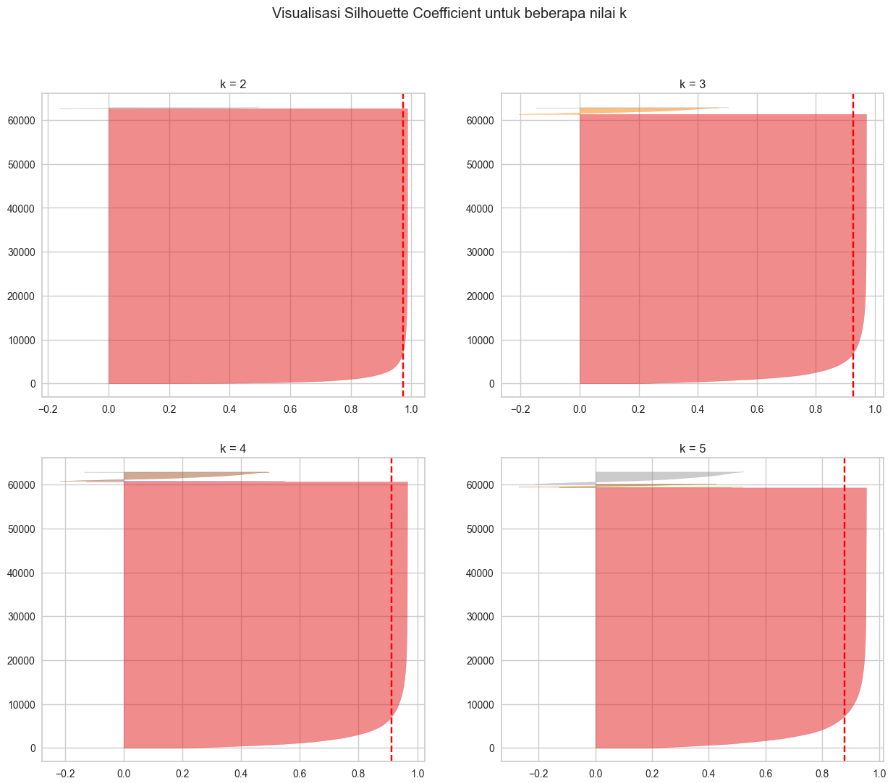

In [ ]:
# Memvisualisasikan elbow method
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(df_new)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

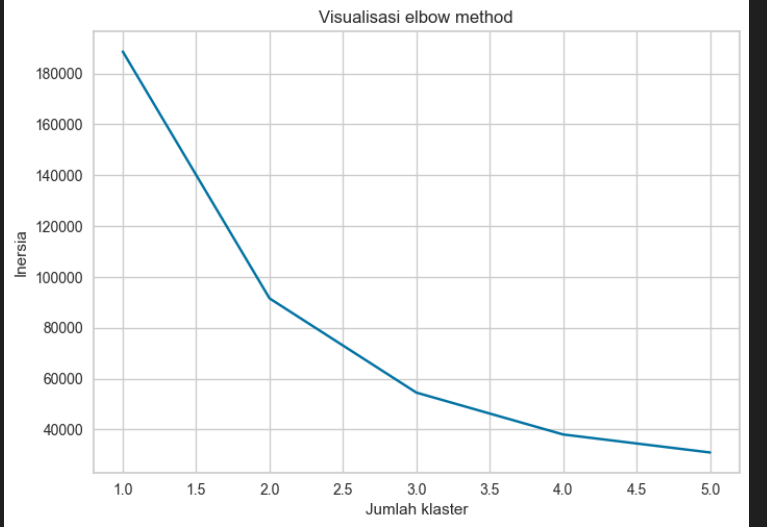

Didapat cluster paling bagus adalah 2

In [ ]:
# Latih model sesuai jumlah klaster optimal
kmeans = KMeans(n_clusters=2, n_init=10)
assignment = kmeans.fit_predict(df_new)

In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters['ebitda']
y = df_with_clusters['total_assets']
z = df_with_clusters['net_sales']
cluster = df_with_clusters['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel('ebitda')
ax.set_ylabel('total_assets')
ax.set_zlabel('net_sales')

plt.show()

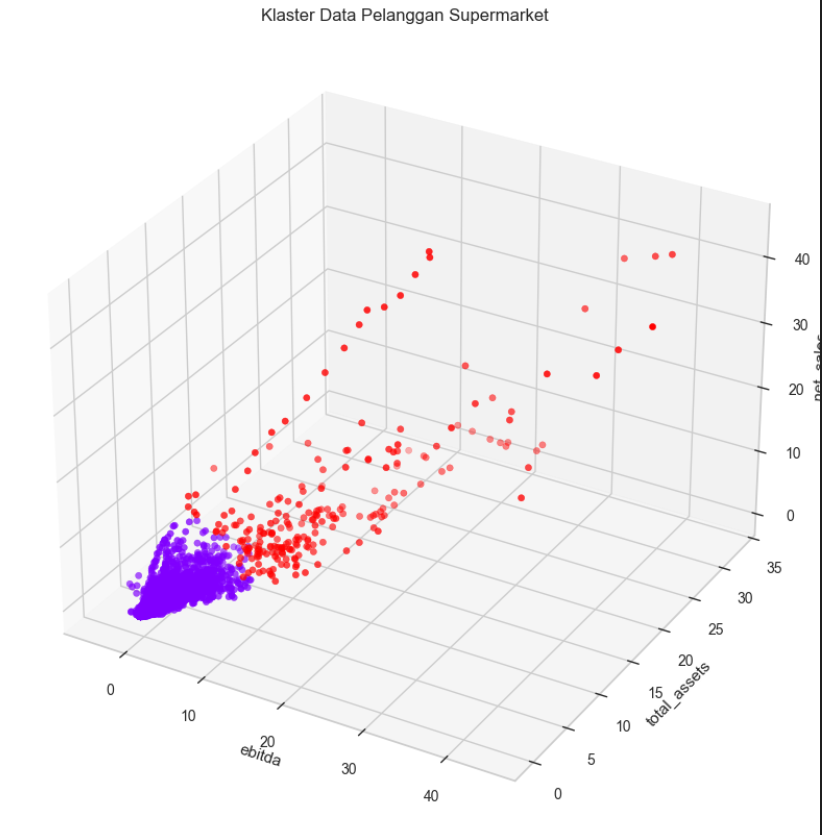

### KMeans 5 fitur pilihan

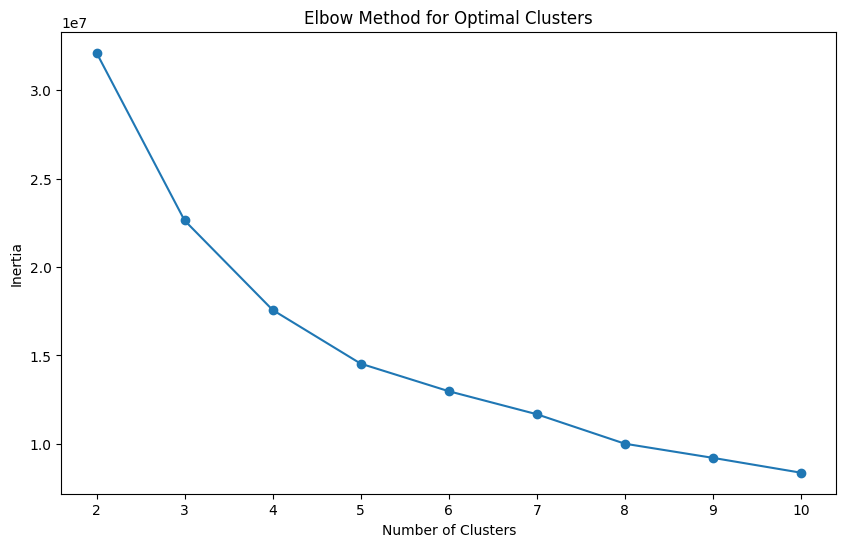

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler

X_clustering = train[['cost_of_goods_sold', 'ebitda', 'inventory', 'total_receivables', 'total_assets']]
scaler = RobustScaler()
X_clustering = scaler.fit_transform(X_clustering)

# K-Means Clustering dengan Elbow Method
inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Terapkan K-Means dengan jumlah cluster optimal (misalnya, k=4 berdasarkan elbow method)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_clustering)

In [ ]:
# Evaluasi K-Means Clustering
silhouette_avg_kmeans = silhouette_score(X_clustering, cluster_labels_kmeans)
print(f"K-Means Silhouette Score: {silhouette_avg_kmeans:.4f}")

K-Means Silhouette Score: 0.9012


In [ ]:
# Tambahkan label cluster ke DataFrame
data_clustering = train.copy()  # Inisialisasi DataFrame baru
data_clustering['Cluster'] = cluster_labels_kmeans

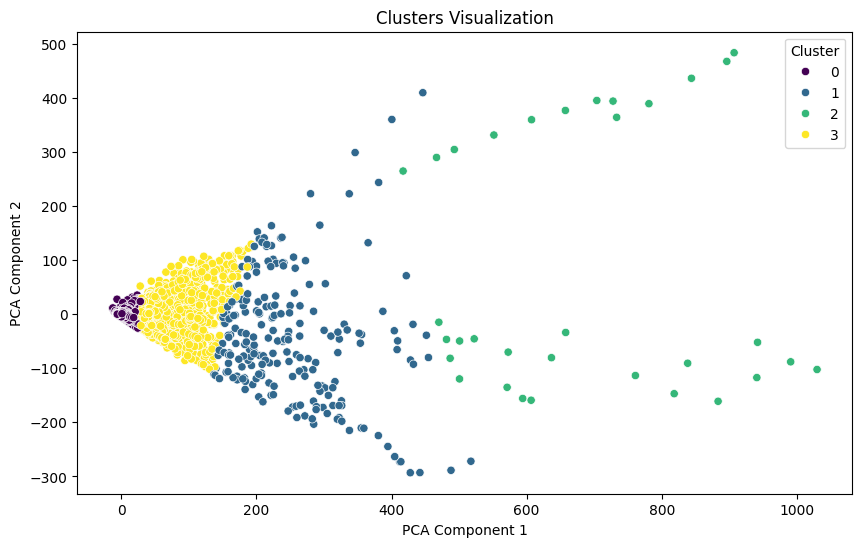

In [ ]:
# PCA untuk visualisasi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_clustering)
data_clustering['PCA1'] = pca_result[:, 0]
data_clustering['PCA2'] = pca_result[:, 1]

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=data_clustering
)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


### KMeans semua fitur

In [ ]:
data_clustering = train.copy()

In [ ]:
data_clustering = data_clustering.drop(['ID', 'company_name'], axis=1)

In [ ]:
data_clustering

,status_label,year,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,net_profit_margin_category
0,alive,1999,833.107,18.373,89.031,336.018,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,201.026,401.483,935.302,3.12,Low Profit Margin
1,alive,2000,713.811,18.577,64.367,320.590,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,204.065,361.642,809.888,3.87,Low Profit Margin
2,alive,2001,526.477,22.496,27.207,286.588,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,139.603,399.964,611.514,2.90,Low Profit Margin
3,alive,2002,496.747,27.172,30.745,259.954,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,124.106,391.633,575.592,1.95,Low Profit Margin
4,alive,2003,523.302,26.680,47.491,247.245,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.884,407.608,604.467,3.29,Low Profit Margin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62891,alive,2011,44889.000,931.000,5143.000,5499.000,4537.000,18497.8566,51035.000,22839.000,3980.000,4212.000,6146.000,414.000,12192.000,45892.000,2.28,Low Profit Margin
62892,alive,2012,38753.000,983.000,5583.000,5075.000,4209.000,32839.1385,45352.000,24220.000,4304.000,4600.000,6599.000,863.000,13041.000,39769.000,2.41,Healthy Profit Margin
62893,alive,2013,36944.000,1021.000,6098.000,5279.000,4501.000,44059.5907,44062.000,27298.000,5776.000,5077.000,7118.000,4100.000,14784.000,37964.000,2.65,Healthy Profit Margin
62894,alive,2013,2.051,0.441,-34.415,7.271,0.660,52.0572,2.255,69.325,0.000,-34.856,0.204,-151.721,6.940,36.670,10.52,Low Profit Margin


In [ ]:
numerical_columns = [
    'cost_of_goods_sold', 'depreciation_and_amortization', 'ebitda',
    'inventory', 'total_receivables', 'market_value', 'net_sales',
    'total_assets', 'total_long_term_debt', 'ebit', 'gross_profit',
    'retained_earnings', 'total_liabilities', 'total_operating_expenses',
    'current_ratio', 'year'
]
numerical_data = data_clustering[numerical_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

In [ ]:
status_label_map = {'failed': 0, 'alive': 1}
data_clustering['status_label'] = data_clustering['status_label'].map(status_label_map)

net_profit_mapping = {
    'Low Profit Margin': 0,
    'Healthy Profit Margin': 1,
    'High Profit Margin': 2
}
data_clustering['net_profit_margin_category'] = data_clustering['net_profit_margin_category'].map(net_profit_mapping)

In [ ]:
categorical_columns = ['status_label', 'net_profit_margin_category']
categorical_data = data_clustering[categorical_columns]

In [ ]:
processed_data = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)
processed_data[categorical_columns] = categorical_data.reset_index(drop=True)
processed_data

,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,year,status_label,net_profit_margin_category
0,-0.070088,-0.151748,-0.130006,0.186585,-0.103099,-0.163020,-0.096345,-0.152893,-0.159331,-0.111793,-0.142399,-0.038716,-0.163213,-0.086052,-0.004974,-1.479142,1,0
1,-0.085111,-0.151368,-0.144087,0.169051,-0.114856,-0.162715,-0.110554,-0.156651,-0.159536,-0.130806,-0.151907,-0.038127,-0.169649,-0.099715,0.002594,-1.248198,1,0
2,-0.108703,-0.144071,-0.165302,0.130406,-0.148500,-0.163591,-0.132854,-0.155849,-0.142740,-0.162214,-0.166795,-0.050616,-0.163458,-0.121327,-0.007193,-1.017254,1,0
3,-0.112447,-0.135364,-0.163282,0.100135,-0.158511,-0.179059,-0.135920,-0.158113,-0.166363,-0.163084,-0.167615,-0.053619,-0.164804,-0.125240,-0.016778,-0.786310,1,0
4,-0.109102,-0.136280,-0.153722,0.085691,-0.124260,-0.167484,-0.131601,-0.155937,-0.128949,-0.149904,-0.161726,-0.052112,-0.162224,-0.122095,-0.003258,-0.555366,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62891,5.477922,1.547521,2.755365,6.054538,3.835516,1.104117,4.638656,1.968637,1.532836,3.054539,1.696892,0.002546,1.741557,4.811742,-0.013449,1.292187,1,0
62892,4.705208,1.644342,3.006566,5.572644,3.542486,2.106725,4.100590,2.101220,1.677133,3.351190,1.836814,0.089537,1.878714,4.144674,-0.012137,1.523131,1,1
62893,4.477399,1.715097,3.300585,5.804499,3.803354,2.891153,3.978453,2.396725,2.332702,3.715889,1.997121,0.716685,2.160298,3.948028,-0.009716,1.754075,1,1
62894,-0.174744,-0.185136,-0.200483,-0.187050,-0.217173,-0.185440,-0.193115,-0.217377,-0.239695,-0.192465,-0.201402,-0.107058,-0.226952,-0.183953,0.069688,1.754075,1,0


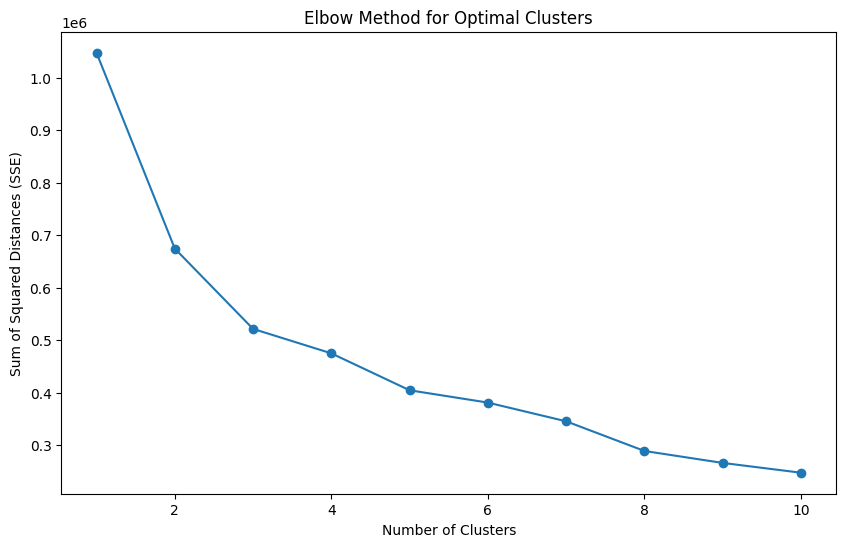

In [ ]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(processed_data)

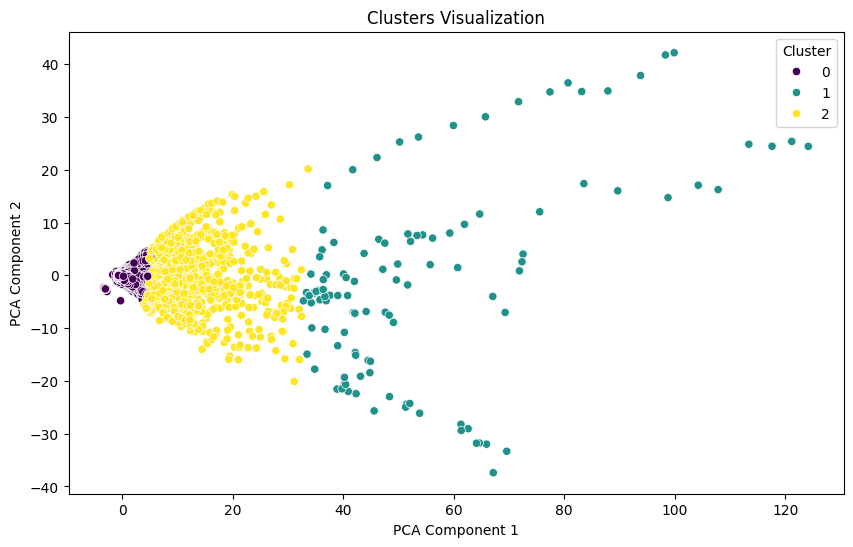

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(processed_data)
data_clustering['PCA1'] = pca_result[:, 0]
data_clustering['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis',
    data=data_clustering
)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Mengambil hanya bagian numerik dari cluster centers
numerical_cluster_centers = kmeans.cluster_centers_[:, :scaled_numerical_data.shape[1]]

# Mengembalikan ke skala asli untuk kolom numerik
cluster_centers_original = scaler.inverse_transform(numerical_cluster_centers)

# Membuat DataFrame untuk pusat cluster
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numerical_columns)

# Menambahkan rata-rata untuk kolom kategorikal (jika ingin menampilkan kategorikal juga)
categorical_modes = data_clustering.groupby('Cluster')[categorical_columns].agg(lambda x: x.value_counts().index[0])
final_cluster_centers_df = pd.concat([cluster_centers_df, categorical_modes], axis=1)

print("Cluster Centers (Original Scale):")
final_cluster_centers_df

Cluster Centers (Original Scale):


,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,total_receivables,market_value,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,retained_earnings,total_liabilities,total_operating_expenses,current_ratio,year,status_label,net_profit_margin_category
0,675.602767,47.613014,131.343016,92.213465,126.746557,1233.255806,979.420443,1108.440270,284.189687,83.729830,303.817812,84.664514,673.117129,848.077459,3.677757,2005.360170,1,0
1,113039.732759,8574.017241,29474.413793,8577.931034,16614.862069,192875.601191,166897.327586,168468.370690,25245.818966,20900.396552,53857.594828,65883.077586,96028.017241,137422.913793,1.155259,2007.853448,1,2
2,19763.982737,1423.559951,5075.906156,2502.037486,3388.094437,43335.333385,29470.601008,35623.410565,8117.125670,3652.346205,9706.618271,7422.756843,21869.035984,24394.694851,1.412030,2006.866467,1,0


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(processed_data, data_clustering['Cluster'])
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.8198


### Agglomerative Clustering

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.feature_selection import *
import scipy.cluster.hierarchy as shc
import numpy as np


df = pd.read_csv('company_train.csv').drop(["ID", "retained_earnings"], axis=1)

df.info()

In [ ]:
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
df['net_profit_margin_category'] = df['net_profit_margin_category'].map({'Low Profit Margin': 0, 'Healthy Profit Margin': 1, 'High Profit Margin': 2})
df['company_name'] = df['company_name'].map({k: v for v, k in enumerate(df['company_name'].unique())})

In [ ]:
from sklearn.cluster import AgglomerativeClustering

aggc = AgglomerativeClustering(linkage='single', compute_distances=True)

In [ ]:
clusters = aggc.fit(df)

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    shc.dendrogram(linkage_matrix, **kwargs)

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(aggc, truncate_mode='level', p=30)
plt.show()